# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. You can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Answer to Exercise 1**

The first step in every data analysis project is data exploration. Prior to cleaning and transforming the data, the data needs to be checked to get the details such as number of records and variables, datatypes of the variables, the number of missing or null values in each column, distribution of the variables, presence of outliers, and correlation between the variables.

The following codes reads the given csv files and store them in different dataframes.

In [2]:
warnings.filterwarnings('ignore') # to ignore the warning messages

training_data=pd.read_csv(training_data_path) #to read the 'Training_data.csv' file from the path defined
training_data.head() #to display the first 5 rows

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [3]:
training_targets=pd.read_csv(training_targets_path) # to read the 'Training_data_targets.csv' file from the path defined
training_targets.head() # to display the first 5 rows

,TARGET_deathRate
0,199.5
1,137.1
2,126.9
3,173.8
4,179.8


The over all information about the datatype of the variables and number of non-null values in each variable can be found using the code given below.

In [4]:
training_data.info() # to check the structure and content of the dataframe and identify the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

From the data information obtained above,there are 31 variables and all of them, except 'PctSomeCol18_24', 'PctEmployed16_Over' and 'PctPrivateCoverageAlone', contain 2438 values. There are no categorical variables.

In [5]:
pd.set_option('display.max_columns', None) #to display all columns in the dataframe
training_data[np.isnan(training_data['PctSomeCol18_24'])] #to display records with NaN values in 'PctSomeCol18_24' column

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,2.27,55.7,37.1,27.9,NaN,2.6,40.6,6.7,39.7,13.2,57.4,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.000000,41,403.800000,47363,22702,13.8,0.000000,40.8,39.8,42.7,2.33,51.1,19.9,33.7,NaN,5.7,35.3,19.3,61.7,3.6,75.2,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.000000,11,352.000000,77222,9899,6.8,0.000000,38.1,36.9,39.8,2.74,62.1,30.2,21.3,NaN,6.6,35.2,17.0,69.7,5.4,76.1,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
4,75.000000,32,407.500000,42839,22255,14.6,0.000000,31.1,30.2,31.6,3.21,59.0,31.0,29.7,NaN,1.4,26.1,9.5,67.4,4.1,59.4,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469
5,110.000000,54,502.900000,46927,14327,14.1,0.000000,44.5,43.4,45.4,2.28,59.4,20.3,25.5,NaN,3.5,35.1,8.7,52.5,8.8,65.5,47.4,42.5,42.4,23.1,98.174779,0.400996,0.373341,0.013827,54.140334,4.019074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,2.60,50.0,16.4,41.8,NaN,6.1,43.1,9.3,49.6,8.0,62.6,NaN,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,2.79,47.2,6.7,25.2,NaN,22.5,23.1,25.1,62.2,5.2,70.5,NaN,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666
2435,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,2.41,47.2,5.3,26.7,NaN,8.4,27.7,19.5,65.1,5.4,76.9,62.4,56.5,28.6,13.7,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288
2436,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,2.25,69.1,8.7,29.1,NaN,6.3,37.7,17.4,62.6,1.9,74.7,NaN,35.1,32.3,12.6,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965


In [6]:
training_data[np.isnan(training_data['PctEmployed16_Over'])] #to display records with NaN values in 'PctEmployed16_Over' column

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
19,412.0,147,460.5,49676,81035,16.0,567.655951,42.0,41.1,42.7,2.62,57.7,15.7,36.0,NaN,4.3,30.4,14.3,NaN,10.2,64.8,51.3,46.4,33.5,18.6,89.267134,5.409787,0.468723,2.367489,58.697820,4.703204
28,259.0,110,477.1,43040,46407,18.1,0.000000,40.1,39.0,41.2,2.41,51.3,22.0,34.4,NaN,5.8,36.6,10.0,NaN,8.0,65.5,NaN,45.1,38.2,20.5,88.518407,7.218295,0.375032,1.189758,47.769715,5.059608
34,87.0,37,488.4,39738,13241,16.2,0.000000,42.6,41.0,43.5,2.43,51.6,20.3,38.4,NaN,4.2,40.9,9.0,NaN,9.4,62.0,45.1,39.4,44.1,25.2,97.718856,0.955414,0.051844,0.481410,50.000000,5.104573
52,40.0,13,432.5,49517,5163,10.7,0.000000,48.9,47.6,50.9,2.15,67.0,21.5,22.7,NaN,9.2,37.0,14.8,NaN,1.7,74.0,54.6,39.3,36.1,16.8,97.105365,0.057893,0.000000,0.000000,59.547202,6.354515
72,328.0,113,529.1,45331,59875,18.3,0.000000,36.7,35.6,37.7,2.69,48.5,25.0,42.1,NaN,5.6,41.0,9.6,NaN,8.5,60.1,46.4,40.6,36.7,21.8,81.099645,14.139739,2.087633,0.306209,48.380437,5.605176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,371.0,154,477.6,40120,57202,16.1,0.000000,45.7,45.2,46.0,2.60,48.1,19.0,35.0,NaN,7.0,45.6,11.9,NaN,9.2,59.0,NaN,37.6,44.4,23.8,96.826945,0.404033,0.623465,0.156737,49.896633,4.600846
2370,61.0,23,497.6,51839,11190,16.3,0.000000,37.4,36.9,38.2,2.96,56.8,29.6,41.5,NaN,2.0,35.4,7.9,NaN,8.6,63.5,49.4,45.2,34.6,20.3,86.290610,0.437344,0.383792,8.380935,59.650053,9.868141
2415,16.0,7,436.8,45251,2542,14.7,0.000000,43.0,41.4,44.3,2.15,55.4,22.6,40.0,NaN,3.0,28.1,17.5,NaN,1.6,67.9,45.6,38.0,34.7,13.3,93.203498,0.278219,0.635930,0.755167,52.153110,6.042296
2421,92.0,43,508.2,34837,13735,23.4,0.000000,40.2,36.8,44.9,2.70,45.5,23.6,40.9,NaN,1.8,38.0,8.2,NaN,7.1,50.7,NaN,32.4,41.4,23.3,68.327893,5.817918,0.036271,0.776206,51.414459,4.598628


In [7]:
training_data[np.isnan(training_data['PctPrivateCoverageAlone'])] #to display records with NaN values in 'PctEmployed16_Over' column

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,2.2700,55.7,37.1,27.9,NaN,2.6,40.6,6.7,39.7,13.2,57.4,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
8,120.000000,49,385.400000,40680,32623,20.6,0.000000,33.8,33.5,34.2,3.0800,53.0,18.3,39.7,39.0,3.0,29.4,9.8,57.6,7.5,54.7,NaN,38.4,33.4,21.0,74.567628,9.805548,0.814057,12.346020,56.887487,6.467920
12,99.000000,48,410.400000,37543,22952,25.5,0.000000,32.1,29.0,34.5,2.4900,36.1,6.4,21.7,NaN,4.3,34.6,12.4,44.4,7.0,69.6,NaN,42.4,30.4,16.0,64.082182,32.911997,1.429068,0.421336,44.621406,7.608005
24,143.000000,60,434.900000,54186,26643,10.4,900.799460,41.3,39.4,43.0,0.0237,54.1,17.5,28.5,45.6,8.4,34.8,17.0,62.9,4.7,78.7,NaN,51.0,31.5,11.8,97.185713,0.890118,0.321958,0.113632,52.253927,4.473126
28,259.000000,110,477.100000,43040,46407,18.1,0.000000,40.1,39.0,41.2,2.4100,51.3,22.0,34.4,NaN,5.8,36.6,10.0,NaN,8.0,65.5,NaN,45.1,38.2,20.5,88.518407,7.218295,0.375032,1.189758,47.769715,5.059608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,192.000000,69,442.500000,54642,35663,11.0,56.080532,45.0,44.3,46.0,2.3200,54.9,15.8,29.5,NaN,25.7,24.4,20.2,64.9,6.4,65.4,NaN,35.7,31.2,15.3,90.405301,2.234461,0.484755,3.731750,51.506447,4.646266
2432,232.000000,97,502.700000,39247,37421,17.7,0.000000,40.3,39.2,41.0,2.5600,53.9,15.7,28.8,NaN,4.1,36.7,10.5,53.8,7.2,61.5,NaN,42.0,39.5,24.1,91.947096,5.018399,0.338649,0.634633,53.745657,4.754260
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,2.6000,50.0,16.4,41.8,NaN,6.1,43.1,9.3,49.6,8.0,62.6,NaN,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,2.7900,47.2,6.7,25.2,NaN,22.5,23.1,25.1,62.2,5.2,70.5,NaN,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666


To find the number of missing values, the below code can be used.

In [8]:
training_data.isna().sum() # to cross check the number of missing values

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

The number of missing values in each of the variables are lised below.

**PctSomeCol18_24** - 1829

**PctEmployed16_Over** - 119

**PctPrivateCoverageAlone** - 483


The histograms of the the variables can be plotted to analyse their distribution and identify any potential outliers.

array([[<AxesSubplot: title={'center': 'avgAnnCount'}>,
        <AxesSubplot: title={'center': 'avgDeathsPerYear'}>,
        <AxesSubplot: title={'center': 'incidenceRate'}>,
        <AxesSubplot: title={'center': 'medIncome'}>,
        <AxesSubplot: title={'center': 'popEst2015'}>,
        <AxesSubplot: title={'center': 'povertyPercent'}>],
       [<AxesSubplot: title={'center': 'studyPerCap'}>,
        <AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'MedianAgeMale'}>,
        <AxesSubplot: title={'center': 'MedianAgeFemale'}>,
        <AxesSubplot: title={'center': 'AvgHouseholdSize'}>,
        <AxesSubplot: title={'center': 'PercentMarried'}>],
       [<AxesSubplot: title={'center': 'PctNoHS18_24'}>,
        <AxesSubplot: title={'center': 'PctHS18_24'}>,
        <AxesSubplot: title={'center': 'PctSomeCol18_24'}>,
        <AxesSubplot: title={'center': 'PctBachDeg18_24'}>,
        <AxesSubplot: title={'center': 'PctHS25_Over'}>,
        <AxesSubpl

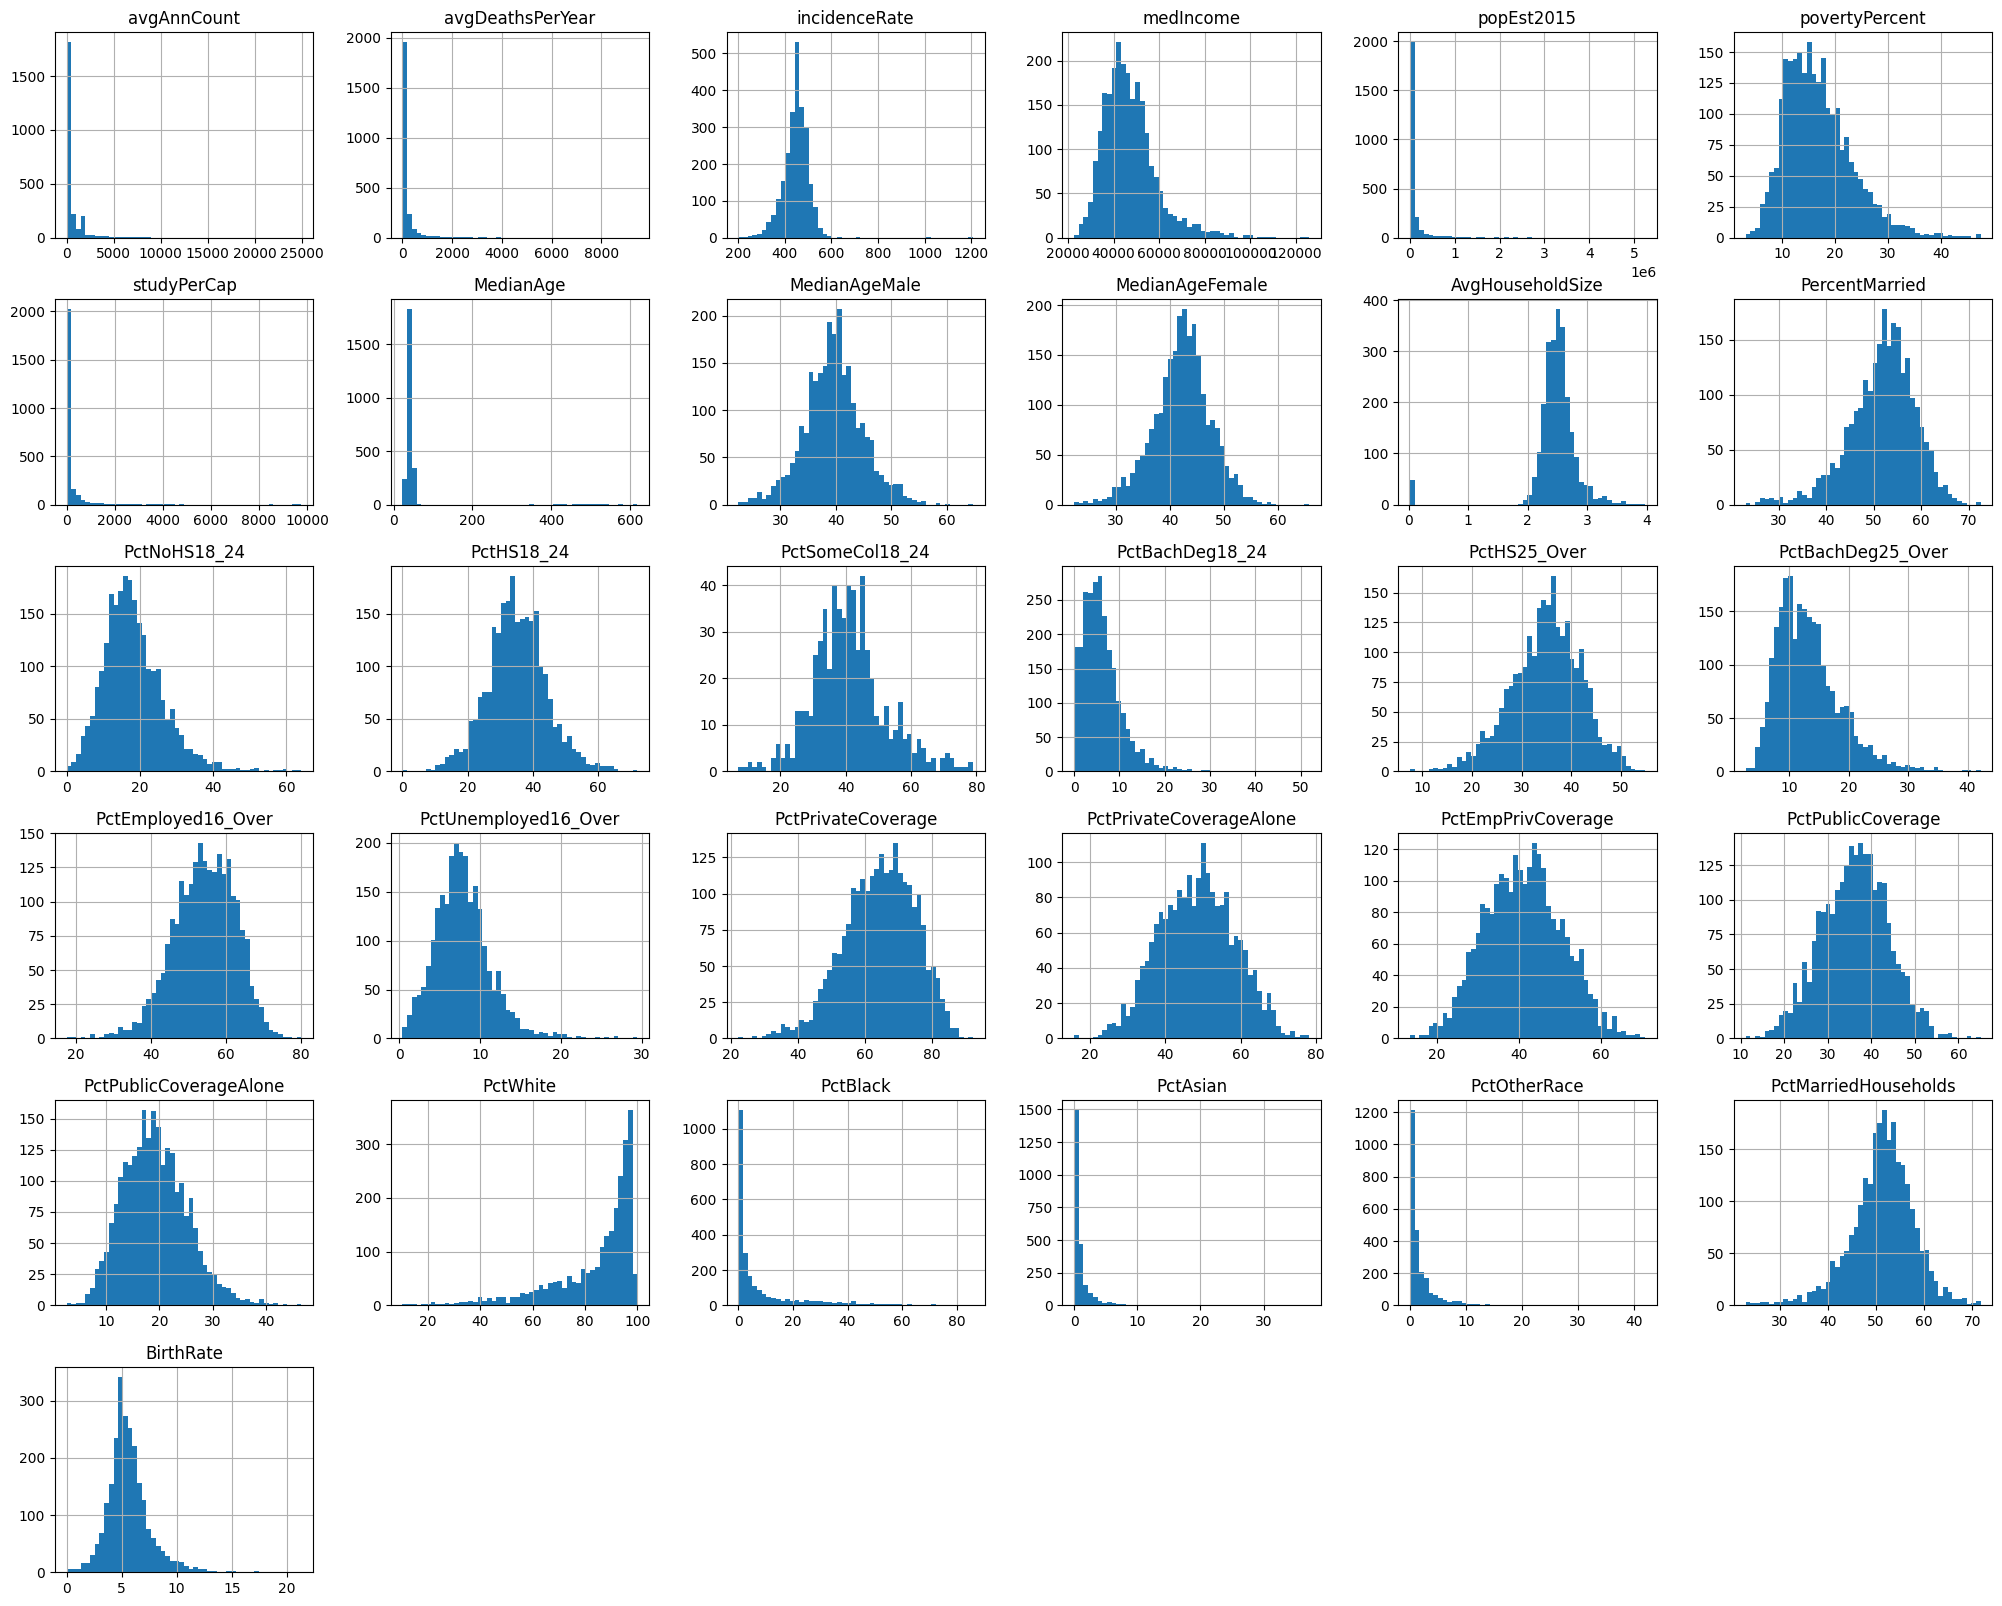

In [9]:
%matplotlib inline
training_data.hist(bins=50,figsize=(25,20)) # to plot the histograms of all varibales

In [10]:
print("Number of records having median age above 200:",len(training_data[training_data['MedianAge']>200]))
print("Number of records having average household size between 0 and 1:",training_data['AvgHouseholdSize'].between(0,1).sum())

Number of records having median age above 200: 26
Number of records having average household size between 0 and 1: 48


**Analysis of the distribution of data using histogram**
* Most of the features are normally distributed with some positive or negative skew. Features such as **MedianAgeMale**, **MedianAgeFemale**, **PctHS18_24**, **PctSomeCol18_24**, **PctPrivateCoverageAlone**, and **PctEmpPrivCoverage** appear to have roughly normal distributions, while the rest are either positively or negatively skewed.
* Features with strong positive skew include **avgAnnCount**, **avgDeathsPerYear**, **popEst2015**, **studyPerCap**, **MedianAge**, **PctBlack**, **PctAsian**, and **PctOtherRace**. **PctWhite** on the other hand has a strong negative skew. All of these variables are concentrated in a particular bin.
* **MedianAge** has 26 values greater than 200. Since the maximum age of a human may go up to 125 years and here median age itself is greater than 200, hence there is a significant abnormality in this data. 
* The **AvgHouseholdSize** has 48 values less than 1. This also seems to be abnormal compared to the rest of the values in the dataset.
* **avgAnnCount**, **avgDeathsPerYear**, **popEst2015**, **studyPerCap**, **PctWhite**, **PctBlack**, **PctAsian**, and **PctOtherRace** have a significant difference in their mean and median values. This may be due to the presence of outliers.


In [11]:
training_data.describe() #to diplay the numerical summaries of the columns

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,609.000000,2438.000000,2438.000000,2438.000000,2319.000000,2438.000000,2438.000000,1955.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,598.332717,183.716981,447.878346,47076.404430,1.014432e+05,16.842535,155.768343,45.622518,39.596555,42.164807,2.481839,51.827482,18.263208,35.115217,41.041051,6.153610,34.899426,13.236341,54.227900,7.831870,64.382855,48.418210,41.193027,36.222600,19.190484,83.624709,9.015025,1.243579,2.005053,51.292494,5.636188
std,1288.683525,456.439174,54.971289,11842.157129,2.900244e+05,6.350803,535.341101,46.660730,5.279995,5.343116,0.428795,6.896036,8.163337,9.047628,11.336937,4.567773,6.994232,5.260886,8.241142,3.433864,10.566318,9.999573,9.441849,7.694826,5.992297,16.420867,14.372832,2.584031,3.558472,6.531800,1.989878
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.700000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,74.250000,28.000000,420.100000,39047.250000,1.170600e+04,12.200000,0.000000,37.725000,36.325000,39.100000,2.370000,47.900000,12.725000,29.300000,34.000000,3.100000,30.500000,9.400000,48.700000,5.500000,57.400000,41.000000,34.400000,30.900000,14.900000,76.994471,0.620614,0.254560,0.296552,47.823118,4.540686
50%,169.000000,61.000000,453.549422,45265.000000,2.578800e+04,15.800000,0.000000,41.000000,39.600000,42.400000,2.500000,52.500000,17.200000,34.800000,40.300000,5.400000,35.400000,12.400000,54.500000,7.600000,65.100000,48.600000,41.100000,36.400000,18.800000,90.157076,2.231131,0.543719,0.843838,51.704554,5.355555
75%,522.750000,149.000000,480.375000,52489.500000,6.851450e+04,20.400000,83.907210,44.100000,42.700000,45.400000,2.630000,56.500000,22.775000,40.800000,46.400000,8.100000,39.600000,16.000000,60.300000,9.675000,72.100000,55.500000,47.700000,41.600000,23.000000,95.409859,10.189792,1.204151,2.219736,55.397599,6.457891
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.400000,9762.308998,619.200000,64.700000,65.700000,3.970000,72.500000,64.100000,72.100000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.200000,70.700000,65.100000,46.600000,100.000000,85.947799,37.156932,41.930251,71.703057,21.326165


**Correlation between variables**

The correlation between variables can be found and sorted in ascending order as follows.

In [12]:
# merging the two dataframes having the training and target variables and storing them in a single dataframe 
training_target_df = pd.concat([training_data, training_targets], axis = 1)
# finding the correlation between all the variables
correlation_matrix = training_target_df.corr()
#sorting the variables in ascending order based on their correlation with the target variable
correlation_matrix['TARGET_deathRate'].sort_values()

PctBachDeg25_Over         -0.491411
medIncome                 -0.416607
PctEmployed16_Over        -0.400317
PctPrivateCoverage        -0.382786
PctPrivateCoverageAlone   -0.355050
PctMarriedHouseholds      -0.290645
PctBachDeg18_24           -0.284566
PercentMarried            -0.266153
PctEmpPrivCoverage        -0.259006
PctSomeCol18_24           -0.186140
PctOtherRace              -0.182602
PctAsian                  -0.181948
PctWhite                  -0.174521
avgAnnCount               -0.150019
popEst2015                -0.130122
avgDeathsPerYear          -0.094048
BirthRate                 -0.088543
AvgHouseholdSize          -0.045545
MedianAgeMale             -0.027263
studyPerCap               -0.024729
MedianAge                 -0.000039
MedianAgeFemale            0.008665
PctNoHS18_24               0.090565
PctBlack                   0.236380
PctHS18_24                 0.266285
PctUnemployed16_Over       0.362612
PctPublicCoverage          0.391899
PctHS25_Over               0

Here most of the variables have a negative correlation (minus sign) with the target variable and a few variables with a positive correlation (positive value). The negative correlation indicates that, as the value of the variable increases, the value of the target variable decreases. Whereas, the value of the target variable increases with an increase in the training variable, in case of positive correlation.

The strength of the correlation is determined by the value of the correlation. Therefore to find the top five variables having the highest correlation with the target variable, they have to be sorted based on their absolute value.

In [13]:
# sorting the correlation matrix based on the absolute value of variables to find the top five variables having strongest correlation with the target variable
abs(correlation_matrix['TARGET_deathRate'][correlation_matrix['TARGET_deathRate'].index!='TARGET_deathRate']).sort_values(ascending=False).head()

PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
Name: TARGET_deathRate, dtype: float64

The top five variables having the highest correlation with the target variable **TARGET_deathRate** in the decreasing order of correlation are:
* PctBachDeg25_Over  
* incidenceRate           
* PctPublicCoverageAlone   
* medIncome                
* povertyPercent           

The correlation among the top five variables listed above and their correltion with the target variable were plotted using scatter matrix plot as shown below.

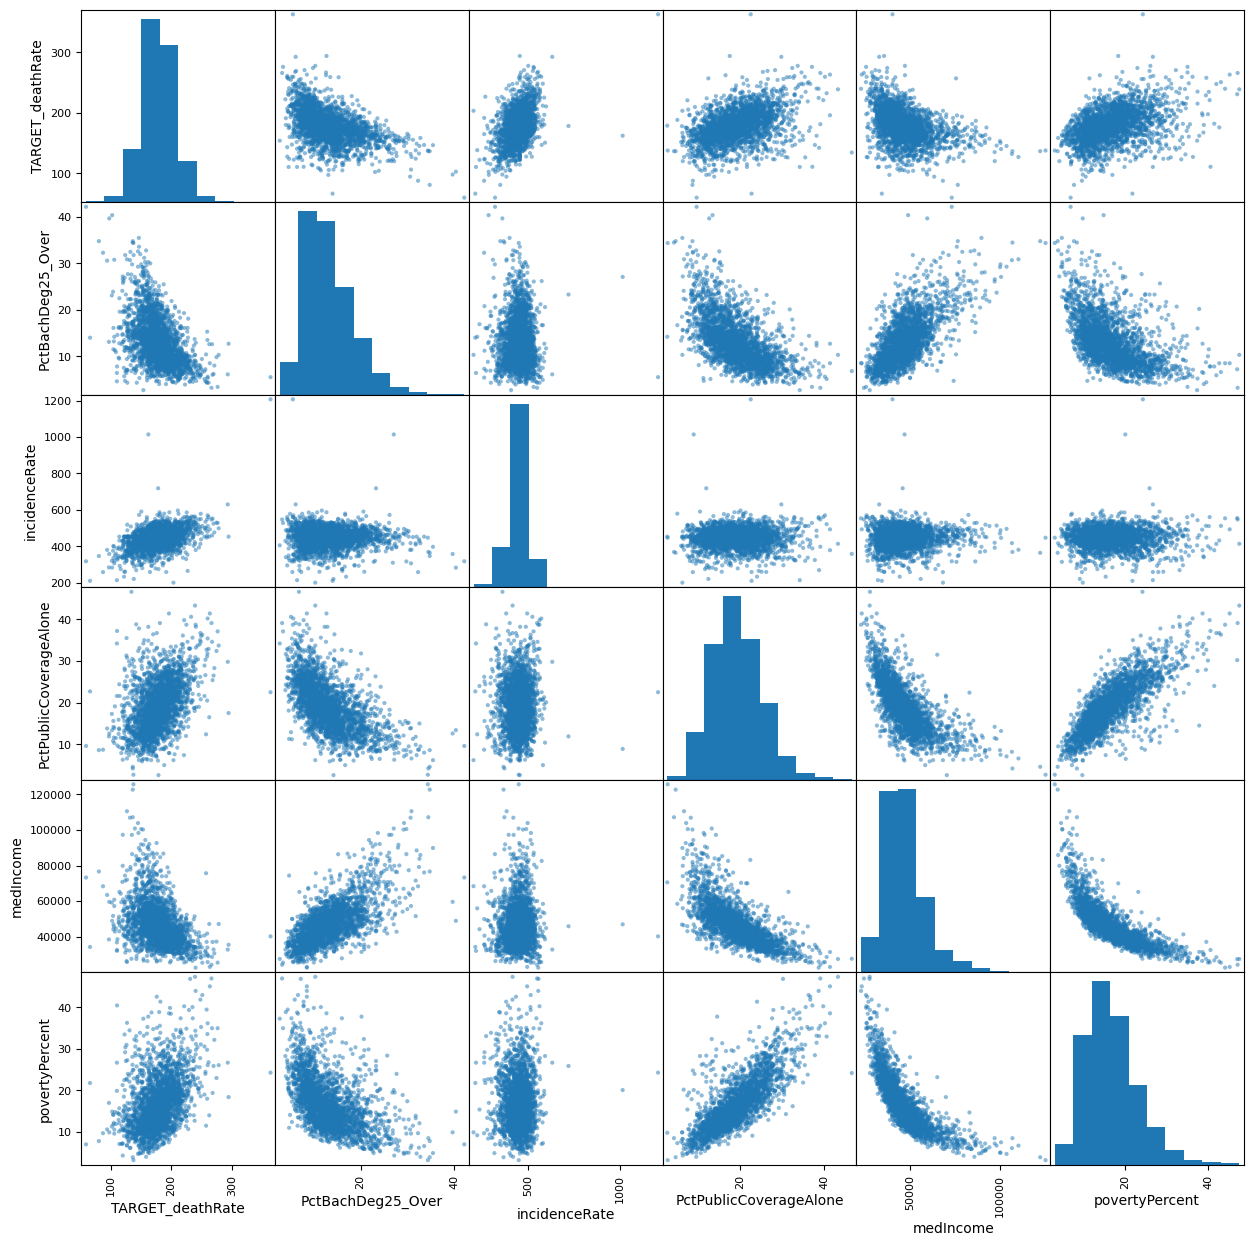

In [14]:
#Plotting scatter matrix plots for the five variables that have a high correlation with the target variable.
pd.plotting.scatter_matrix(training_target_df[['TARGET_deathRate','PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone',
                                        'medIncome','povertyPercent']], 
                           #defining the figure size
                           figsize=(15,15));

In [15]:
# finding the correlation values between the top 5 variables plotted above
training_target_df[['TARGET_deathRate','PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone','medIncome',
             'povertyPercent']].corr() 

,TARGET_deathRate,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,medIncome,povertyPercent
TARGET_deathRate,1.000000,-0.491411,0.443983,0.439734,-0.416607,0.413260
PctBachDeg25_Over,-0.491411,1.000000,-0.024455,-0.599208,0.691206,-0.519242
incidenceRate,0.443983,-0.024455,1.000000,0.023177,0.019830,-0.010297
PctPublicCoverageAlone,0.439734,-0.599208,0.023177,1.000000,-0.709009,0.791595
medIncome,-0.416607,0.691206,0.019830,-0.709009,1.000000,-0.784652
povertyPercent,0.413260,-0.519242,-0.010297,0.791595,-0.784652,1.000000


From the scatter matrix the following inference can be made:
* Variables such as **incidenceRate**, **PctPublicCoverageAlone**, and **povertyPercent** have a positive correlation with **TARGET_deathRate**. This means that the death rate may increase with an increase in the number of cancer-diagnosed patients, the number of people having government health coverage alone, and poverty. Whereas, **PctBachDeg25_Over** and **medIncome** have a negative correlation with **TARGET_deathRate**. People aged above 25 years with a Bachelor's degree and people having more income tend to have less death rate compared to others. 


* The correlations of variables with the target variable might be affected by the multicollinearity among the variables. Such relationships are listed below.
    * **Positively correlated** training variables are:
        * **PctPublicCoverageAlone** and **povertyPercent** (0.791595): 
          The percentage of people who rely on the government's health coverage alone increases with the rise in poverty. Both of these factors together and individually increases the death rate.
        * **PctBachDeg25_Over** and **medIncome** (0.691206): 
          As the bachelor's education among people aged above 25 years increases, the population's median income increases. The more the median income the population has, the fewer the percentage of death.
    * **Negatively correlated** training variables are:
        * **medIncome** and **povertyPercent** (-0.784652): An increase in the median income of the population decreases the property. This in turn decreases the death rate.
        * **PctPublicCoverageAlone** and **medIncome** (-0.709009): As the median income increases, the percentage of people relying on public health coverage alone decreases, which in turn decreases the death rate.
        * **PctBachDeg25_Over** and **PctPublicCoverageAlone** (-0.599208): More percentage of people over 25 years of age prefer health coverage from multiple sources, rather than depending on public healthcare insurance policies.
        * **PctBachDeg25_Over** and **povertyPercent** (-0.519242): As the percentage of people with a bachelor's degree increases, the poverty percentage of the population decreases. This reduces the death rate.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Answer to Exercise 2**

While data exploration, null values were found in 3 columns namely **PctSomeCol18_24**, **PctEmployed16_Over**, and **PctPrivateCoverageAlone**. These null values should be replaced by some appropriate values and a machine learning pipeline can be used to preprocess the data.

In [16]:
#defining an empty list
ls=[]
#iterating through all the rows to find sum of the mentioned columns
for i,row in training_data.iterrows():
    #checking for non-null values
    if not pd.isnull(row['PctSomeCol18_24']): 
        #taking the sum of the columns
        row_sum=np.round(row['PctSomeCol18_24']+row['PctNoHS18_24']+ row['PctHS18_24']+row['PctBachDeg18_24']) 
        #appending the sum of the columns to the list
        ls.append(row_sum) 
print(ls)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0

* After detailed inspection it was found that, the sum of **PctSomeCol18_24**, **PctNoHS18_24**, **PctHS18_24**, and **PctBachDeg18_24** add up to 100. This strategy can be used to fill 1829 missing values in the column **PctSomeCol18_24**. A class named **MissingValueFiller** was created for this purpose. 
* **PctEmployed16_Over** and **PctPrivateCoverageAlone** can be filled using simple imputation of the median values of each of the columns. A _SimpleImputer()_ class from scikit-learn was used to do this.
* To make the machine learning model perform better and easier, all the features were scaled using Z-score normalisation, in which the mean and standard deviation of the values are set to 0 and 1 respetivley. For this purpose a _StandardScaler()_ class was used from scikit-learn.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Creating a class to handle the missing values in the column PctSomeCol18_24
class MissingValueFiller():
    
    #defining a constructor which accepts function as an argument
    def _init_(self, func): 
        self.func = func
    #returns the object
    def fit(self, X, y=None):
        return self
    # defining a function to fill the missing values using the sum of other columns' values
    def transform(self, X, y=None):
        #iterating through each row of the dataframe
        for i, row in X.iterrows():
            #checking for null value in the column
            if (pd.isnull(row['PctSomeCol18_24'])):
                # filling the null value with value obtained from 100 minus sum of the mentioned column
                X.loc[i, 'PctSomeCol18_24'] = 100.0 - row['PctNoHS18_24'] - row['PctHS18_24'] - row['PctBachDeg18_24']
        return X

In [18]:
#Creating a pipeline to handle the missing values in all the columns using various strategies.
pipeline= Pipeline([
    #calling the function created to handle missing values
    ('missing_value_filler', MissingValueFiller()),
    #calling the imported function to impute median values to records having null values in the particular column
    ('imputer',SimpleImputer(strategy="median")),
    #calling the imported function to scale the values with 0 mean and standard deviation 1
    ('std_scaler',StandardScaler())
])

Before building the machine learning models, it is essential to split the data into train and test data sets. The training data set is used to train the model, whereas, the test data set is used to evaluate the model performance on unknown data. Usually the train data is set larger than the test data and the splitting is done randomnly to ensure that both the sets are representative of the whole. 

In this data, the split was done on the ratio 70:30 for train and test data respectively and the random_state was set at 42 for reproduciblitiy.

In [19]:
from sklearn.model_selection import train_test_split
#Creating train and test data split for both Training and Target data. test_size =0.3 shows 30% of the data are assigned to test set and rest to train set.
tr_data, ts_data, target_train, target_test = train_test_split(training_data, training_targets["TARGET_deathRate"].values, test_size=0.3, random_state=42)


The split data was transformed using the pipeline created to treat null values and scale them.

In [20]:
#Fitting the pipeline to the data to transform it to the required form and storing it in a variable
data_train = pipeline.fit_transform(tr_data)
print(data_train.shape)
data_test= pipeline.fit_transform(ts_data)
print(data_test.shape)
print(target_train.shape)

(1706, 31)
(732, 31)
(1706,)


The training data can be seen below.

In [21]:
data_train

array([[-0.13630869, -0.01861111,  0.46014569, ..., -0.42042876,
         0.14717833,  0.04386536],
       [-0.25064721, -0.1660058 ,  0.18057432, ..., -0.49411108,
         0.39651027, -0.76999926],
       [-0.28594635, -0.20285447,  1.00990685, ..., -0.48552413,
        -0.95116495, -1.26186849],
       ...,
       [ 0.27960725,  0.49510275,  0.5239405 , ..., -0.24908007,
        -4.14592336, -0.37731033],
       [ 1.05823541,  1.34045466,  0.11395419, ..., -0.31278084,
         0.63828187, -0.05262316],
       [-0.43942086, -0.37625999, -2.88720549, ..., -0.58033558,
         1.04295846,  4.01634692]])

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Answer to Exercise 3**

**OLS Regression**

Ordinary Least Squares (OLS) regression is used to evaluate the linear relationship between one or more independent variables and a dependent variable. This regression minimizes the sum of squared residuals of the model. The linear regression formula is:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$

where $y$ is the dependent variable, independent variables are denoted by $x_1, x_2, ..., x_p$ , $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the coefficients that describe the connection between the independent variables and the dependent variable, and $\epsilon$ is the error term.

LinearRegression() class from the _sklearn.linear_model_ module was used to fit the ols regression model to the preprocessed datasets _data_train_ and _target_train_. The fit() method trains the ols regression model using the train data and the predict() method predicts the target variable for the _data_test_ data.

In [22]:
from sklearn.linear_model import LinearRegression
ols_model = LinearRegression()
ols_model.fit(data_train, target_train)
target_pred = ols_model.predict(data_test) #Storing the predicted data in a variable 

The performance metrices of the model trained and tested previously was calculated. The metrices were rounded of to 4 digits and they are:
* **Root Mean Squared Error (RMSE)**: Calculates the root of the mean of the squared errors between predicted and true values. This is better than MSE since it is more interpretable metric of model performance. Lower RMSE value indicates a better model. 
* **Mean Absolute Error (MAE)**: Computes the mean of absolute error between predicted and true values. Low MAE score shows that the model performs good.
* **$R^2$ error**: Computes the ratio of explained variance to total variance. The $R^2$ value ranges between 0 and 1 and higher the value, better the model performance.


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Calculating MSE
ols_mse = mean_squared_error(target_test, target_pred)
print("OLS model MSE:", round(ols_mse,4))

#Calculating RMSE
ols_rmse=round(np.sqrt(ols_mse),4)
print("OLS model RMSE:", ols_rmse)

#Calculating MAE
ols_mae = round(mean_absolute_error(target_test, target_pred),4)
print("OLS model MAE:", ols_mae)

#Calculating R-squared error
ols_r2 = round(r2_score(target_test, target_pred),4)
print("OLS model R\N{SUPERSCRIPT TWO}:", ols_r2)

OLS model MSE: 418.3995
OLS model RMSE: 20.4548
OLS model MAE: 15.0742
OLS model R²: 0.4418


From the obtained values, RMSE, MAE and $R^2$ values can be compared with Lasso and Ridge regression models to determine the best performing model.

**Lasso Regression**

The Lasso (Least Absolute Shrinkage and Selection Operator) regression (also known as L1 Regularisation) reduces the model complexity by adding a penalty term to the loss function which is proportional to the absolute value of the coefficient's magnitude. By reducing the coefficients of less significant attributes to zero, the L1 regularisation strategy helps to reduce model overfitting. As a result, the model becomes sparse, with just the most pertinent features kept, making it easier to read and perhaps boosting its generalisation performance on fresh data. L1 regularisation is beneficial when the number of features is more than the sample size, since it aids to find the most relevant features, and thereby increasing the model performance.

The following code performs a lasso regression of the data. Grid search using repeated k-fold cross validation technique, with 10 folds repeating 10 times, was used for the evaluation of the model performance to increase the accuracy and robustness of the model and to prevent overfitting. The model which gave the lowest MSE score was taken as the best performing model. _RepeatedKFold_ and _GridSearchCV_ functions were imported from _scikit-learn_ package for this purpose.

Grid search is a hyperparameter tuning method that tests all the combinations of hyperparameters from a defined set and identify the set of optimal values for the best model performance. The hyperparameter used for tuning this model was alpha with 1000 values ranging from 0.001 to 5.

Repeated cross validation entails dividing the dataset into k equally sized folds, with each fold being used once as a validation set and the remaining k-1 folds as the training set. This process is repeated r times, each time with a different random split, and the model's performance is averaged over all r iterations.The "repeated" component refers to the fact that the procedure is repeated r times, each time with a different random split, to produce a more robust assessment of the model's performance. When the dataset is tiny, noisy, or imbalanced, and the aim is to acquire a more solid estimate of the model's performance, this is effective.

The best hyperparameters obtained from the grid search was used to train the model and predict the values of target variables for unseen data.

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold, GridSearchCV

#defining the grid for lasso regression
#alpha value controls the strength of the regularisation
#np.linspace defines the range of alpha values to search
lasso_param_grid = {'alpha': np.linspace(0.001, 5, 1000)}

#defining the repeated k-fold cross validation with 10 splits, 10 repeats
#random state was set at 42 for reproducibility
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

#Creating the GridSearchCV object using Lasso() regression model
#lasso_param_grid has the range of alpha values, cv has the repeated k-fold cv object
#neg_mean_squared_error metric was used as the scoring metric
#n_jobs=-1 specifies to use all the available CPU cores to make the computation faster
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
#fitting the training data and target variable of the train set to train the model
grid_result_lasso=lasso_grid_search.fit(data_train, target_train)

In [25]:
#findind the best hyperparameter value from gridsearch
best_lasso_params = lasso_grid_search.best_params_
print("Best Lasso parameters: ", best_lasso_params)
print("Best score: ",round(grid_result_lasso.best_score_,4))

Best Lasso parameters:  {'alpha': 0.05604404404404405}
Best score:  -383.6566


The best parameter obtained from gridsearch was alpha=0.0560 with an MSE score of -383.6482, and this parameter was used to train and test the data for further predictions.

In [26]:
#Defining a lasso regression model with alpha value obtained from grid search
lasso_regression=Lasso(alpha=best_lasso_params['alpha'], random_state=42)
#fitting the training data and target variable of the train set to train the model
lasso_regression.fit(data_train, target_train)
#prediciting the values of test data and storing them in a variable
lasso_preds = lasso_regression.predict(data_test)

The MSE, MAE and RMSE values of the Lasso regression model were found as shown below and can be used for model evaluation.

In [27]:
#finding MSE
lasso_mse = mean_squared_error(target_test, lasso_preds)
#finding rmse
lasso_rmse = round(np.sqrt(lasso_mse),4)
#finding mae
lasso_mae = round(mean_absolute_error(target_test, lasso_preds),4)
#finding R-squared error
lasso_r2 = round(r2_score(target_test, lasso_preds),4)

print("Lasso regression-mean squared error: ", round(lasso_mse,4))
print("Lasso regression-root mean squared error: ", lasso_rmse)
print("Lasso regression-mean absolute error: ", lasso_mae)
print("Lasso regression-R\N{SUPERSCRIPT TWO}: ", lasso_r2)

Lasso regression-mean squared error:  357.5575
Lasso regression-root mean squared error:  18.9092
Lasso regression-mean absolute error:  13.9852
Lasso regression-R²:  0.523


**Ridge Regression**

Ridge regression (L2 regularisation) also prevents overfitting by adding a penalty term to the cost function similar to lasso regression. Here  The penalty term is proportional to the square of the coefficient magnitudes. This regression augments the OLS cost function with an L2 penalty term, which tends to reduce the size of all coefficients without necessarily decreasing any of them to zero. This minimises the model's variance without increasing the bias too much. The penalty term's strength is determined by a hyperparameter known as alpha. The size of the coefficients reduces as alpha increases, resulting in a simpler model with less overfitting. Ridge regression performs better when all the features are important.

The ridge regression was performed with Grid search using repeated k-fold cross validation technique. The hyperparameter used for tuning this model was alpha with 1000 values ranging from 0.001 to 50. The k- fold cross validation was defined using 10 folds and 10 repeats. The model returning the lowest MSE score was considered as the best model. 

In [28]:
from sklearn.linear_model import Ridge

#defining the grid for Ridge regression
#np.linspace defines the range of alpha values to search
ridge_param_grid = {'alpha': np.linspace(0.001, 50, 1000)}

#defining the repeated k-fold cross validation with 10 splits, 10 repeats
#random state was set at 42 for reproducibility
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
#Creating the GridSearchCV object using Ridge() regression model
#lasso_param_grid has the range of alpha values, cv has the repeated k-fold cv object
#neg_mean_squared_error metric was used as the scoring metric
#n_jobs=-1 specifies to use all the available CPU cores to make the computation faster
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
#fitting the training data and target variable of the train set to train the model
grid_result_ridge=ridge_grid_search.fit(data_train, target_train)

In [29]:
#findind the best hyperparameter value from gridsearch
best_ridge_params = ridge_grid_search.best_params_
print("Best Ridge parameters: ", best_ridge_params)
print("Best score: ",round(grid_result_ridge.best_score_,4))

Best Ridge parameters:  {'alpha': 22.77331731731732}
Best score:  -383.2834


The best parameter obtained from gridsearch was alpha=23.3238 with an MSE score of -383.2572, and this parameter was used to train and test the data for further predictions.

In [30]:
#Defining a Ridge regression model with alpha value obtained from grid search
ridge_regression=Ridge(alpha=best_ridge_params['alpha'],random_state=42)
#fitting the training data and target variable of the train set to train the model
ridge_regression.fit(data_train, target_train)
#prediciting the values of test data and storing them in a variable
ridge_preds = ridge_regression.predict(data_test)

The RMSE, MAE, $R^2$ values of the Ridge regression model were found and shown below.

In [31]:
#finding MSE
ridge_mse = mean_squared_error(target_test, ridge_preds)
#finding rmse
ridge_rmse = round(np.sqrt(ridge_mse),4)
#finding mae
ridge_mae = round(mean_absolute_error(target_test, ridge_preds),4)
#finding R-squared error
ridge_r2 = round(r2_score(target_test, ridge_preds),4)

print("Ridge mean squared error: ", round(ridge_mse,4))
print("Ridge root mean squared error: ", ridge_rmse)
print("Ridge root mean absolute error: ", ridge_mae)
print("Ridge R\N{SUPERSCRIPT TWO}: ", ridge_r2)

Ridge mean squared error:  357.7864
Ridge root mean squared error:  18.9152
Ridge root mean absolute error:  13.9955
Ridge R²:  0.5227


**Quantitative comparison of the models**

A dataframe was created using the metric scores of OLS, Lasso and Ridge regression models to compare the models.

In [32]:
metric_score ={'Model':['OLS','Lasso','Ridge'], 
               'RMSE':[ols_rmse,lasso_rmse,ridge_rmse], 'MAE':[ols_mae,lasso_mae,ridge_mae],'$R^2$':[ols_r2,lasso_r2,ridge_r2]}
metrics=pd.DataFrame(metric_score)
metrics.style.hide_index()

Model,RMSE,MAE,$R^2$
OLS,20.454800,15.074200,0.441800
Lasso,18.909200,13.985200,0.523000
Ridge,18.915200,13.995500,0.522700


The model with lowest RMSE and MAE scores and highest $R^2$ value is considered to be the best performing model. The following code gives the best model based on each of the metrics scores mentioned.

In [33]:
best_model_rmse = metrics.loc[metrics['RMSE'].idxmin(), 'Model']
best_model_mae = metrics.loc[metrics['MAE'].idxmin(), 'Model']
best_model_r2 = metrics.loc[metrics['$R^2$'].idxmax(), 'Model']
print("Best model based on RMSE score is:",best_model_rmse)
print("Best model based on MAE score is:",best_model_mae)
print("Best model based on R\N{SUPERSCRIPT TWO} score is:",best_model_r2)

Best model based on RMSE score is: Lasso
Best model based on MAE score is: Lasso
Best model based on R² score is: Lasso


From the model comparison results, the Lasso model was obtained as the best model based on RMSE,MAE and $R^2$ scores. Therefore, Lasso model can be declared as the best performing model for this data among OLS, Lasso and Ridge regression models.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

The best performing model from exercise 3 was lasso regression model. Hence the regularisation weight of the Lasso model is considered as the best regularisation weight. 

In [34]:
print("The best regularisation weight obtained is ",round(best_lasso_params['alpha'],5))

The best regularisation weight obtained is  0.05604


In [35]:
#Performing Lasso regression with best regularisation weight obtained previously
regression_lasso=Lasso(alpha=best_lasso_params['alpha'],random_state=42)
#fitting the lasso model with train and target data for training the model
regression_lasso.fit(data_train,target_train)
#mapping the regression coefficients to the column names using dictionary
imp_features={'Features':training_data.columns,'Coefficient':regression_lasso.coef_}
#converting the dictionary to a dataframe
lasso_VarImp=pd.DataFrame(imp_features)
#taking the absolute value of the coefficients
lasso_VarImp['Coefficient']=np.abs(lasso_VarImp['Coefficient'])
#sorting the coefficients in descending order and displaying the top 5 important features based on the regression coefficents 
lasso_VarImp.sort_values(by = 'Coefficient', ascending = False).head().style.hide_index()

Features,Coefficient
incidenceRate,10.202016
PctBachDeg25_Over,7.741083
PctMarriedHouseholds,6.987270
PercentMarried,6.695868
PctPrivateCoverage,6.425327


Lasso regression using the best regularisation weight (alpha =0.05604) was performed and the top five features for the given data set were found. The top 5 features for this regression task are:
* **incidenceRate**: Mean per capita (100,000) cancer diagoses
* **PctBachDeg25_Over**:Percent of county residents ages 25 and over highest education attained: bachelor's degree
* **PctMarriedHouseholds**: Percent of married households
* **PercentMarried**: Percent of county residents who are married
* **PctPrivateCoverage**: Percent of county residents with private health coverage

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Answers for Exercise 5**

**Random Forest Regression**


Random Forest Regression is a supervised machine learning approach that integrates many decision trees to provide an effective ensemble model for regression problems. Multiple decision trees are generated on distinct subsets of the training data in this approach, with each tree employing a random collection of features. Each tree predicts an output value for a specific collection of input attributes, and the average of the predictions from all the trees is the final prediction.

This Random Forest regressor model uses grid search with repeated k-fold cross validation technique to find the best hyperparameter. 10 number of folds with 10 repeats were used for cross validation. The random state was set at 42 for reproducibility. The hyperparameter grid was defined using 2 parameters namely **n_estimators** and **max_features**.

**n_estimators**: Used to define the number of decision trees in a Random Forest model. The accuracy of the model increases and chances of overfitting reduces as the number of trees increases. However, a higher number increases the computational cost and hence an optimal number was chosen through grid search.

**max_features**: Used to define the maximum number of features to be considered for each split. As the number of features increases,  the correlation among the tress increases and diversity decreases. Hence, it reduces the efficacy of the Random Forest algorithm. In this model, the values such as 6, 8, 10 and a maximum of square root of number of features or $log_2$ of the number of features were given inside the grid for searching. Optimal number of max_features were obtained after grid search.

The hyperparameters with lowest MSE score was taken as the best parameter. The following code performs the fitting and training of the data on Random Forest model.

In [36]:
from sklearn.ensemble import RandomForestRegressor

#defining the repeated k-fold cross validation with 10 splits, 10 repeats
#random state was set at 42 for reproducibility
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
#defining the grid for Random Forest regression
#np.linspace defines the range of n_estimators and max_features values to search
rf_param_grid=[{'n_estimators': [25,50,100],'max_features':[6,8,10,'sqrt','log2']}]
#Creating the GridSearchCV object using RandomForestRegressor() regression model
#cv has the repeated k-fold cv object
#neg_mean_squared_error metric was used as the scoring metric
#n_jobs=-1 specifies to use all the available CPU cores to make the computation faster    
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
#fitting the training data and target variable of the train set to train the model
grid_result_rf=rf_grid_search.fit(data_train, target_train)

In [37]:
#findind the best hyperparameter value from gridsearch
best_rf_params=grid_result_rf.best_params_
print('Best Parameters:',best_rf_params)
print('Best Score:', grid_result_rf.best_score_)

Best Parameters: {'max_features': 10, 'n_estimators': 100}
Best Score: -359.1478449682257


The best parameters obtained from gridsearch was n_estimators=100 and max_features=10 with the lowest MSE score and these parameters were used to train and test the data for further predictions.

In [38]:
#Defining a Random Forest regression model with n_estimators and max_features values obtained from grid search
rf_regression=RandomForestRegressor(n_estimators=best_rf_params['n_estimators'],max_features=best_rf_params['max_features'],random_state=42)
#fitting the training data and target variable of the train set to train the model
rf_regression.fit(data_train, target_train)
#prediciting the values of test data and storing them in a variable
rf_preds = rf_regression.predict(data_test)

The RMSE, MAE, $R^2$ values of the Random Forest regression model were found and shown below.

In [39]:
#finding MSE
rf_mse = mean_squared_error(target_test, rf_preds)
#finding RMSE
rf_rmse = np.sqrt(rf_mse)
#finding MAE
rf_mae = mean_absolute_error(target_test, rf_preds)
#finding R-squared error
rf_r2 = r2_score(target_test, rf_preds)
print("Random Forest - MSE:", round(rf_mse,4))
print("Random Forest - RMSE:", round(rf_rmse,4))
print("Random Forest - MAE:", round(rf_mae,4))
print("Random Forest - R-squared:", round(rf_r2,4))

Random Forest - MSE: 378.0119
Random Forest - RMSE: 19.4425
Random Forest - MAE: 13.914
Random Forest - R-squared: 0.4957


**Model Comparison**

To compare the Random Forest regressoin model with the best model obtained among OLS, Lasso and Ridge regression models, a dataframe was created using the metric scores Random Forest regression model and Lasso regression model, which was obtained as the best among the three.

In [40]:
#creating a dictionary of all Lasso and Random Forest models and all the metrices
score_lasso_vs_rf= {'Model':['Lasso','Random Forest'], 'RMSE':[lasso_rmse, rf_rmse], 'MAE':[lasso_mae, rf_mae], '$R^2$':[lasso_r2, rf_r2]}
#converting the dictionary to a dataframe
score=pd.DataFrame(score_lasso_vs_rf)
#to hide the index of the df
score.style.hide_index()

Model,RMSE,MAE,$R^2$
Lasso,18.909200,13.985200,0.523000
Random Forest,19.442529,13.914005,0.495702


The model which gives the lowest **_RMSE_** and **_MAE_** scores and the highest $R^2$ score is the best model. Based on these metrics scores, the best model was found using the following code.

In [41]:
rmse_best_model = score.loc[score['RMSE'].idxmin(), 'Model']
mae_best_model=score.loc[score['MAE'].idxmin(), 'Model']
r2_best_model=score.loc[score['$R^2$'].idxmax(), 'Model']
print("Best model among Random Forest and lasso based on rmse score is ",rmse_best_model)
print("Best model among Random Forest and lasso based on mae score is ",mae_best_model)
print("Best model among Random Forest and lasso based on R\N{SUPERSCRIPT TWO} score is ",r2_best_model)

Best model among Random Forest and lasso based on rmse score is  Lasso
Best model among Random Forest and lasso based on mae score is  Random Forest
Best model among Random Forest and lasso based on R² score is  Lasso


Lasso model was found as the best model based on RMSE and $R^2$ scores from the model comparison results. Lasso had the lowest RMSE score of 18.9027 and highest $R^2$ score of 0.5233. Hence, Lasso model can be declared as the best performing model for this data among Lasso and Random Forest regression models.

The variable importance of the Random Forest model was calculated and the variables were ordered in the decreasing order of their importance and the top 5 features are shown below.

In [42]:
#mapping the feature importance to the column names using dictionary for random forest model
imp_features={'Features':training_data.columns,'Feature Importance':rf_grid_search.best_estimator_.feature_importances_}
#Converting the dictionary to a dataframe
rf_VarImp=pd.DataFrame(imp_features)
#Sorting the features in descending order of importance and displaying the top 5 variables
rf_VarImp.sort_values(by = 'Feature Importance', ascending = False).head().style.hide_index()

Features,Feature Importance
incidenceRate,0.148510
PctBachDeg25_Over,0.106503
medIncome,0.064296
PctPublicCoverageAlone,0.061627
PctHS25_Over,0.055359


The top five features from the Random Forest regression model are:
* **incidenceRate**: Mean per capita (100,000) cancer diagoses
* **PctBachDeg25_Over**:Percent of county residents ages 25 and over highest education attained: bachelor's degree
* **medIncome**: Median income per county
* **PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma
* **PctPublicCoverageAlone**: Percent of county residents with government-provided health coverage alone


Whereas, the top five features from the Lasso regreesion model are:

In [43]:
lasso_VarImp.sort_values(by = 'Coefficient', ascending = False).head().style.hide_index()

Features,Coefficient
incidenceRate,10.202016
PctBachDeg25_Over,7.741083
PctMarriedHouseholds,6.987270
PercentMarried,6.695868
PctPrivateCoverage,6.425327


Comparing the top five features from Random Forest and Lasso regression models, incidenceRate and PctBachDeg25_Over come out as the most important features in both the models. Random Forest relies on medIncome and PctHS25_Over as the third and fourth important variables while lasso model depends on PctMarriedHousehold and PercentMarried as the third and fourth. The least important variable in Random Forest regression model is PctPublicCoverageAlone while in Lasso it is PctPrivateCoverage.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [44]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


# **Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



The Lasso regression model was obtained as the best model and that can be used to predict unknown data. 

Prior to prediction, the data needs to be checked for null values and if any null values are present, they need to be handled using the pipeline created earlier. Also the data need to be scaled using z-score normalisation for better machine learning performance.

In [45]:
#checking for null values in the test dataset.
test_data.isna().sum() 

avgAnnCount                 0
avgDeathsPerYear            0
incidenceRate               0
medIncome                   0
popEst2015                  0
povertyPercent              0
studyPerCap                 0
MedianAge                   0
MedianAgeMale               0
MedianAgeFemale             0
AvgHouseholdSize            0
PercentMarried              0
PctNoHS18_24                0
PctHS18_24                  0
PctSomeCol18_24            27
PctBachDeg18_24             0
PctHS25_Over                0
PctBachDeg25_Over           0
PctEmployed16_Over          2
PctUnemployed16_Over        0
PctPrivateCoverage          0
PctPrivateCoverageAlone     7
PctEmpPrivCoverage          0
PctPublicCoverage           0
PctPublicCoverageAlone      0
PctWhite                    0
PctBlack                    0
PctAsian                    0
PctOtherRace                0
PctMarriedHouseholds        0
BirthRate                   0
dtype: int64

In [46]:
#Using pipeline to fix the null values in the data and scaling the data
test_data_trans = pipeline.transform(test_data) 
train_data=pipeline.transform(training_data)
#converting the tarnsformed data into a dataframe
test_data_trans_df = pd.DataFrame(test_data_trans, columns = test_data.columns)
test_data_trans_df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.366871,-0.265692,-0.663584,-0.259899,-0.268578,0.540025,-0.245171,-0.145576,-0.277429,-0.386131,0.371093,0.847317,-0.618277,0.700875,0.188803,-0.688450,0.360059,-0.520339,0.143157,-0.234204,-0.826646,-0.016690,-0.696321,-0.135845,0.117806,0.074970,-0.139999,-0.197178,0.843826,0.812564,1.119548
1,0.115268,0.209379,0.449899,0.147799,0.138916,-0.609911,0.632727,-0.141180,-0.351135,-0.148412,0.087346,0.533122,-0.262532,0.223504,0.125725,-0.257359,-0.900197,0.445440,0.357119,-0.006683,0.327348,0.341052,0.019430,-0.564023,-0.687368,0.661498,-0.617399,-0.133114,-0.433161,0.432402,0.669696
2,29.948003,31.098003,-0.738612,0.689623,35.916736,0.291390,0.182441,-0.224693,-0.940781,-0.971286,1.325513,-1.396934,-0.345539,-0.864457,0.621336,0.841923,-1.990531,1.206919,0.482979,0.590560,-0.844963,-0.135938,-0.164620,-0.400308,0.617014,-1.898436,-0.033582,4.903009,4.578545,-1.070492,-0.462317
3,-0.423546,-0.330986,-0.107695,-1.009047,-0.338006,0.959597,-0.145597,-0.103820,-0.111591,0.144165,-0.144810,-0.424425,-0.487837,-0.975474,1.342226,-0.429795,1.124709,-0.928938,-0.788206,-0.291084,-1.220469,-1.425978,-1.064422,1.387968,1.373878,0.843539,-0.578011,-0.437918,-0.521787,-0.554685,0.097965
4,-0.418757,-0.353501,-1.444557,2.065570,-0.248793,-1.091642,-0.245171,-0.275239,-1.346163,-1.465011,1.970391,0.233889,0.401525,-1.064287,0.378036,0.432387,-1.240041,0.798321,1.968126,-0.120443,0.446411,1.056536,1.052157,-2.113024,-1.347611,-0.766878,0.407819,1.525551,0.626995,0.867101,0.636361


Tha transformed data can be used to train the Lasso regression model with best estimator, using training data and can be used to predict the test data as shown below.

In [47]:
#using the best estimator obtained from the Lasso model
best_model=grid_result_lasso.best_estimator_
#fitting the training data and target variable of the train set to train the model
best_model_fit=best_model.fit(train_data, training_targets['TARGET_deathRate'])
#predicting the target variable values for test data
bestmodel_preds = best_model_fit.predict(test_data_trans)
print("The RMSE score for the model using the unknown data is", round(np.sqrt(mean_squared_error(test_targets['TARGET_deathRate'], bestmodel_preds)),4))
print("The MAE score for the model using the unknown data is", round(mean_absolute_error(test_targets['TARGET_deathRate'], bestmodel_preds),4))
print("The R-Squared value score for the model using the unknown data is", round(r2_score(test_targets['TARGET_deathRate'], bestmodel_preds),4))

The RMSE score for the model using the unknown data is 22.8384
The MAE score for the model using the unknown data is 17.1081
The R-Squared value score for the model using the unknown data is 0.3106


The transformed data was retrained with the best set of hyperparameters associated with the best model (Lasso model) on the given training set and predicted the target variable. The metrics score for the predictions were obtained and are shown above.

# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [48]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


The heart attack data was read from the csv file and converted into two dataframes, one for the training features and the other fot the target feature as shown below.

In [49]:
warnings.filterwarnings('ignore') # to ignore the warning messages

heart_data_features=pd.read_csv(data_features_path) #to read the 'Heart-attack-data-predictors.csv' file from the path defined
heart_data_features.head() #to display the first 5 rows

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.00
1,72.0,0,0.380,6.000,4.100,1.70
2,55.0,0,0.260,4.000,3.420,1.00
3,60.0,0,0.253,12.062,4.603,1.45
4,57.0,0,0.160,22.000,5.750,2.25


In [50]:
heart_targets=pd.read_csv(data_targets_path) # to read the 'Heart-attack-data-targets.csv' file from the path defined
heart_targets.head() # to display the first 5 rows

,Target-class
0,0
1,0
2,0
3,0
4,0


The information about the data such as the total number of rows and columns, datatype of the variables, and number of non-null values present in each feature were found.


In [51]:
heart_data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      126 non-null    float64
 1   PericardialEffusion   131 non-null    int64  
 2   FractionalShortening  124 non-null    float64
 3   epss                  117 non-null    float64
 4   lvdd                  121 non-null    float64
 5   WallMotionIndex       130 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.3 KB


There are in total 6 features and 131 records in the data. All the columns except _PericardialEffusion_ are numerical variable, whereas _PericardialEffusion_ is a categorical variable represented in the form of 0's and 1's. There are some missing information as well. The number of missing values in the variables were found and are shown below.

In [52]:
heart_data_features.isna().sum()

AgeAtHeartAttack         5
PericardialEffusion      0
FractionalShortening     7
epss                    14
lvdd                    10
WallMotionIndex          1
dtype: int64

The correlation between the target variable and the predictor variables were found. Their absolute values in the decreasing order of correlation are shown below.

In [53]:
all_feature_df = pd.concat([heart_data_features, heart_targets], axis = 1)
cor_matrix=all_feature_df.corr()
abs(cor_matrix['Target-class']).sort_values(ascending=False)

Target-class            1.000000
WallMotionIndex         0.373907
AgeAtHeartAttack        0.279823
epss                    0.277626
FractionalShortening    0.225171
PericardialEffusion     0.209524
lvdd                    0.189690
Name: Target-class, dtype: float64

To identify the distribution of the features and the outliers present in them, histograms were plotted for all of the features.

array([[<AxesSubplot: title={'center': 'AgeAtHeartAttack'}>,
        <AxesSubplot: title={'center': 'PericardialEffusion'}>],
       [<AxesSubplot: title={'center': 'FractionalShortening'}>,
        <AxesSubplot: title={'center': 'epss'}>],
       [<AxesSubplot: title={'center': 'lvdd'}>,
        <AxesSubplot: title={'center': 'WallMotionIndex'}>]], dtype=object)

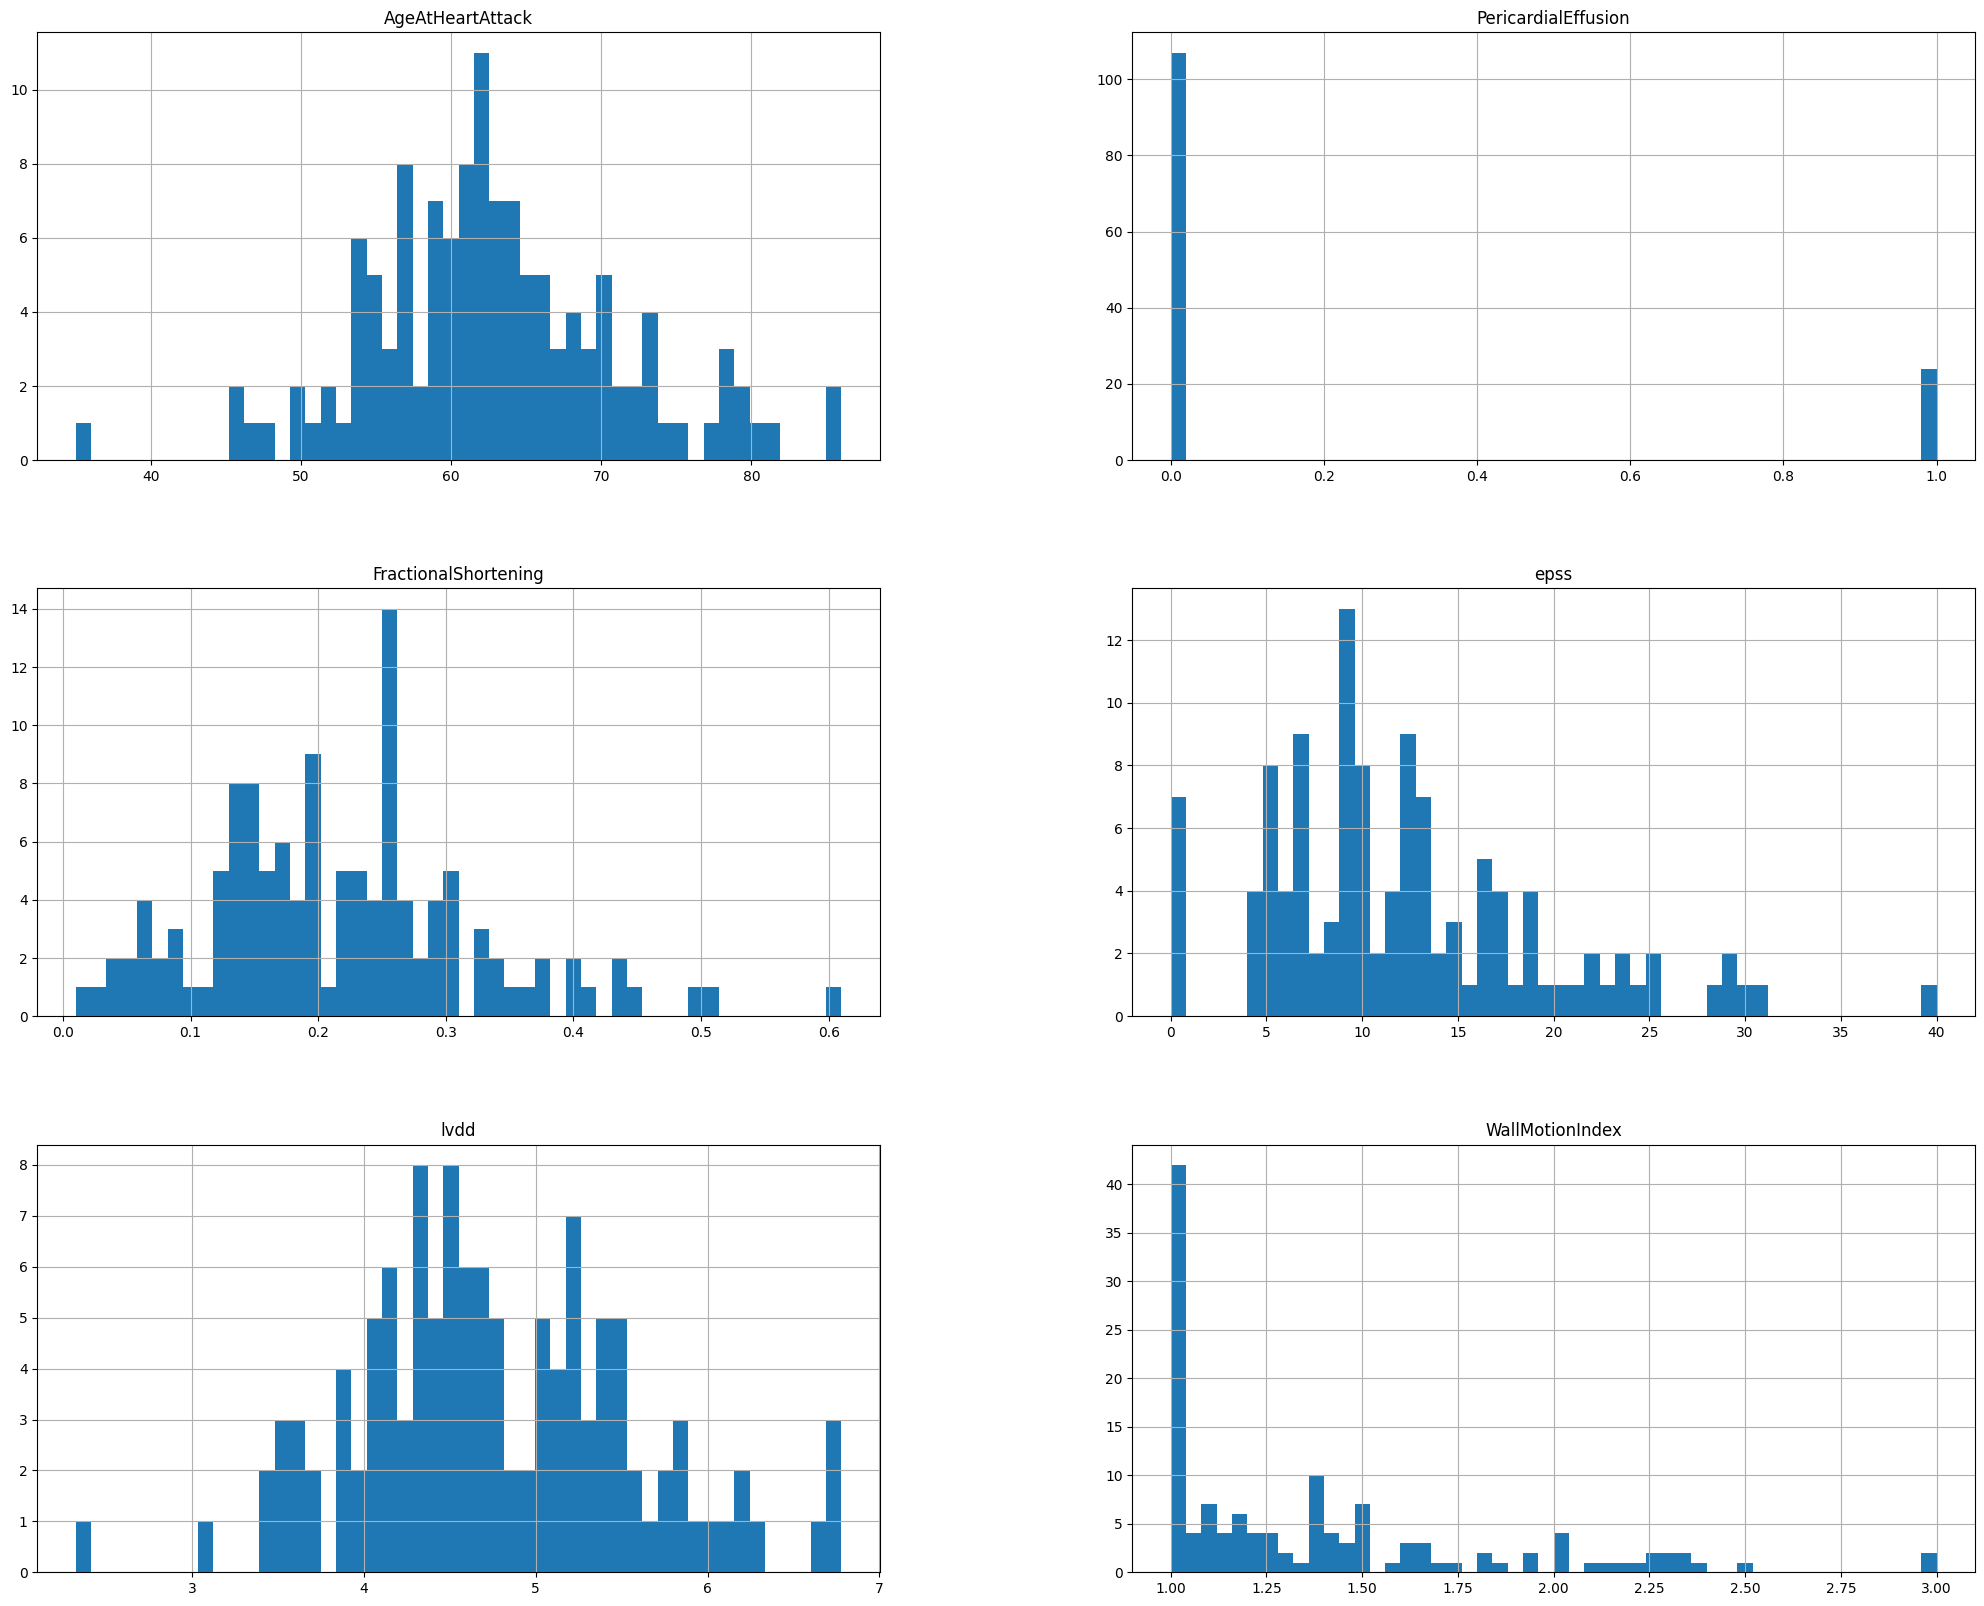

In [54]:
%matplotlib inline
heart_data_features.hist(bins=50,figsize=(25,20)) # to plot the histograms of all varibales

To get the numerical summaries of the features, the following code was used.

In [55]:
heart_data_features.describe()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
count,126.000000,131.000000,124.000000,117.000000,121.000000,130.00000
mean,62.813722,0.183206,0.216734,12.164769,4.763157,1.37800
std,8.342110,0.388320,0.107513,7.370159,0.810013,0.45185
min,35.000000,0.000000,0.010000,0.000000,2.320000,1.00000
25%,57.000000,0.000000,0.150000,7.000000,4.230000,1.00000
50%,62.000000,0.000000,0.205000,11.000000,4.650000,1.21600
75%,67.750000,0.000000,0.270000,16.100000,5.300000,1.50750
max,86.000000,1.000000,0.610000,40.000000,6.780000,3.00000


From the histogram and variable description, __epss__ and __FractionalShortening__ were found to have significant outliers due to the highly abnormal values. In general values above 20mm for _epss_ are considered abnormal and values below 10% for __FractionalShortening__ are considered to be extremely rare. Rest of the numerical features such as __AgeAtHeartAttack__, 
__lvdd__ and __WallMotionIndex__ have minimum and maximum values which are quite common. These abnormal values may have occured due to measurement errors or mistakes created during data entry. Also these values may not occur in the future. Hence these values must be treated before doing and train-test split of the data for model creation.

The following code checks for the upper 95% quantile values of _epss_.

In [56]:
heart_data_features[heart_data_features['epss']>heart_data_features['epss'].quantile(0.95)].sort_values(by='epss',ascending=False)

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
107,78.0,0,0.23,40.0,6.23,1.400
6,62.0,0,0.23,31.0,5.43,1.875
73,50.0,0,0.06,30.1,5.95,2.390
98,58.0,0,0.17,28.9,6.73,2.010
114,62.0,1,0.19,28.9,6.63,1.950
117,62.0,1,0.24,28.6,5.86,1.950


The predictor variable __epss__ has 6 highly abnormal values above 28 and they constitute the upper 95% quantile. These values can be considered as outliers because its far more than 20mm and these values are located far from 95% of the data in the histogram.

The following code checks for the lower 5% quantile values of FractionalShortening.

In [57]:
heart_data_features[heart_data_features['FractionalShortening']<heart_data_features['FractionalShortening'].quantile(0.05)].sort_values(by='FractionalShortening',ascending=True)

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
53,60.0,0,0.010,24.6,5.65,3.00
47,59.0,0,0.030,21.3,6.29,1.31
106,57.0,0,0.036,7.0,4.12,1.23
49,56.0,1,0.040,14.0,5.00,NaN
82,78.0,0,0.050,10.0,4.44,1.36
85,73.0,0,0.050,14.8,4.14,1.41


In __FractionalShortening__, there are 6 abnormal values ranging from 0.05 and 0.01. Since these values are far less than 10% and constitute the lower 5% quantile of the histogram, they can be considered as outliers.

The outliers found above were treated using a function named _outlier_handling()_.The function uses quantile based capping and flooring for _epss_ and _FractionalShortening_ respectively. Capping means replacing the values above a particular upper limit with the upper limit. Flooring means replacing the values below a particular lower limit to with the lower limit.

Here for _epss_ the values above 95% quantile were replaced with the value of 95% quantile. For _FractionalShortening_ the values below 5% quantile were replaced with the value of 5% quantile.

The skewness of the distributions of _epss_ and _FractionalShortening_ before treating outliers are shown below.

In [58]:
print ("The distribution of epss has a skew of",round(heart_data_features['epss'].skew(),4)," prior to outlier treatment")
print ("The distribution of FractionalShortening has a skew of",round(heart_data_features['FractionalShortening'].skew(),4)," prior to outlier treatment")

The distribution of epss has a skew of 0.9672  prior to outlier treatment
The distribution of FractionalShortening has a skew of 0.7382  prior to outlier treatment


In [59]:
def outlier_handling(df):
  
    ninetyfive_per_qt = df['epss'].quantile(0.95)
    five_per_qt = df['FractionalShortening'].quantile(0.05)
    df["FractionalShortening"]=np.where(df['FractionalShortening']<five_per_qt, five_per_qt,df['FractionalShortening'])
    df["epss"]=np.where(df['epss']>ninetyfive_per_qt, ninetyfive_per_qt,df['epss'])

The skewness of the distributions of _epss_ and _FractionalShortening_ before treating outliers in the data are shown below.

In [60]:
print ("The distribution of epss has a skew of",round(heart_data_features['epss'].skew(),4)," prior to outlier treatment")
print ("The distribution of FractionalShortening has a skew of",round(heart_data_features['FractionalShortening'].skew(),4)," prior to outlier treatment")

The distribution of epss has a skew of 0.9672  prior to outlier treatment
The distribution of FractionalShortening has a skew of 0.7382  prior to outlier treatment


Created a copy of the dataset and treated the outliers in it.

In [61]:
#creating a copy of the dataframe
heart_data=heart_data_features.copy()
#calling the function to handle outliers using the copied dataframe
outlier_handling(heart_data)

print ("The distribution of epss has a skew of",round(heart_data['epss'].skew(),4)," after outlier treatment")
print ("The distribution of FractionalShortening has a skew of",round(heart_data['FractionalShortening'].skew(),4)," after outlier treatment")

The distribution of epss has a skew of 0.4913  after outlier treatment
The distribution of FractionalShortening has a skew of 0.836  after outlier treatment


The positive skew of _epss_ decreased significantly to 0.4913 from 0.9672, whereas, the skew of _FractionalShortening_ slightly increased from 0.7382 to 0.836. The numerical summary of the distributions of _epss_ and _FractionalShortening in the data are shown below. 

In [62]:
heart_data.describe()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
count,126.000000,131.000000,124.000000,117.000000,121.000000,130.00000
mean,62.813722,0.183206,0.217895,11.901692,4.763157,1.37800
std,8.342110,0.388320,0.105610,6.682411,0.810013,0.45185
min,35.000000,0.000000,0.060000,0.000000,2.320000,1.00000
25%,57.000000,0.000000,0.150000,7.000000,4.230000,1.00000
50%,62.000000,0.000000,0.205000,11.000000,4.650000,1.21600
75%,67.750000,0.000000,0.270000,16.100000,5.300000,1.50750
max,86.000000,1.000000,0.610000,26.120000,6.780000,3.00000


The histograms of all the predictor variables after outlier treatment are shown below.

array([[<AxesSubplot: title={'center': 'AgeAtHeartAttack'}>,
        <AxesSubplot: title={'center': 'PericardialEffusion'}>],
       [<AxesSubplot: title={'center': 'FractionalShortening'}>,
        <AxesSubplot: title={'center': 'epss'}>],
       [<AxesSubplot: title={'center': 'lvdd'}>,
        <AxesSubplot: title={'center': 'WallMotionIndex'}>]], dtype=object)

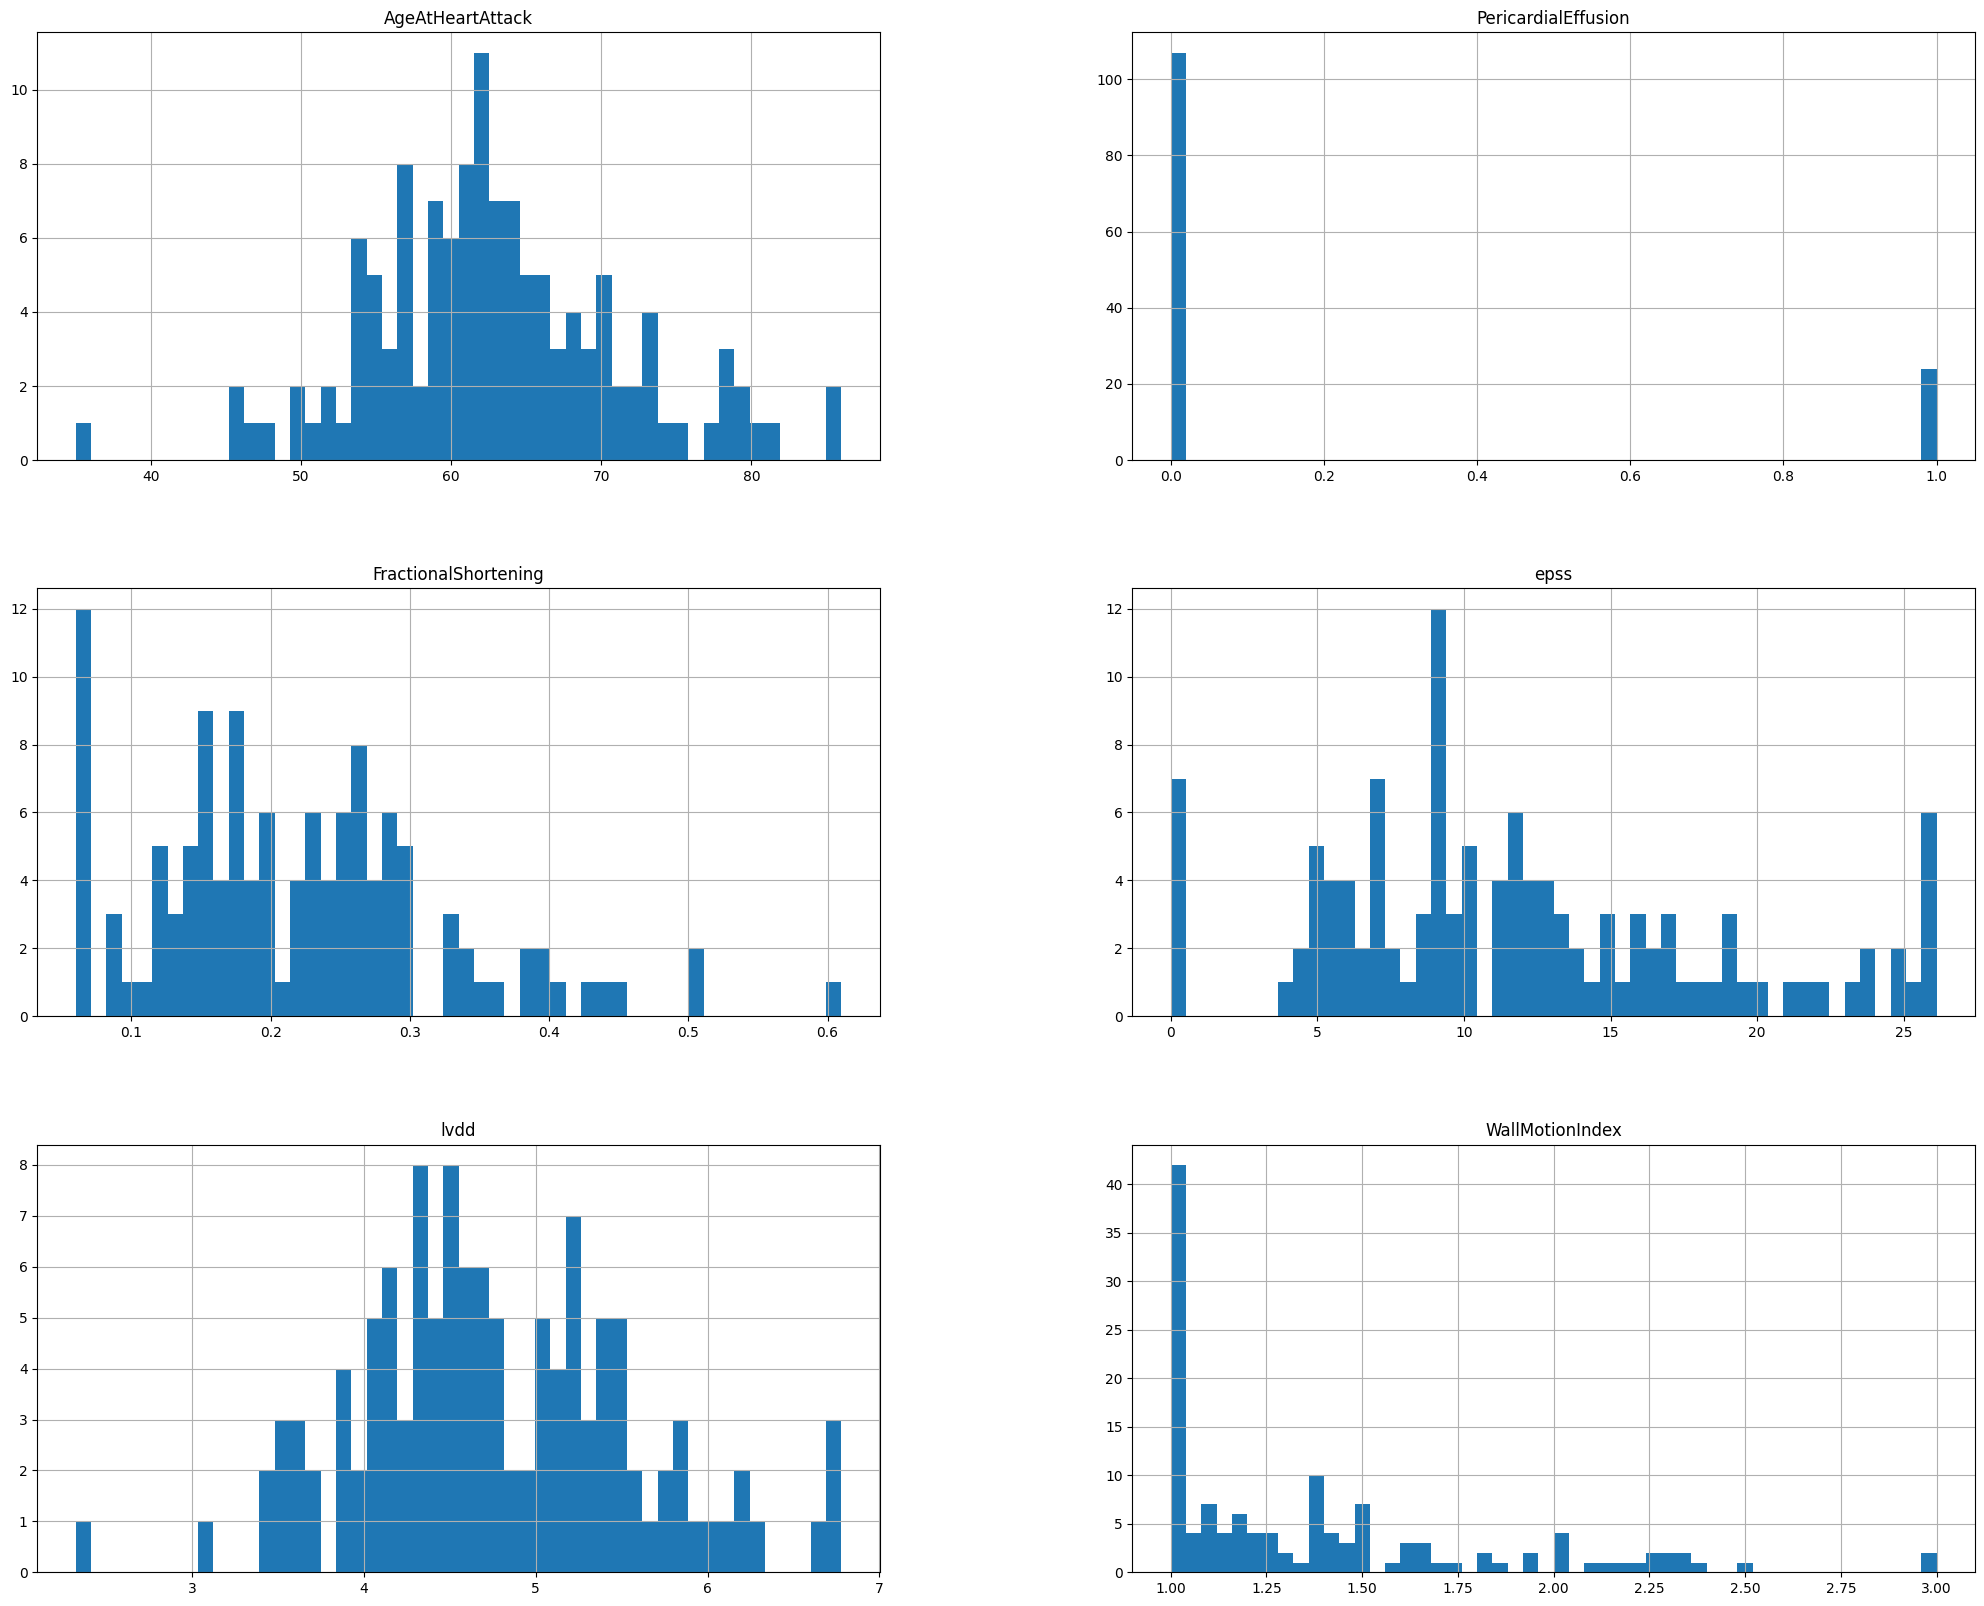

In [63]:
%matplotlib inline
heart_data.hist(bins=50,figsize=(25,20)) # to plot the histograms of all varibales

From the numerical summary and histogram, it is evident that significant outliers in the dataset were treated as there are not much values concentrated on bins far away from majority of the dataset.

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

The number of missing values in each column were found earlier and are listed below.
* __AgeAtHeartAttack__ - 5
* __FractionalShortening__ - 7
* __epss__ - 14
* __lvdd__ - 10
* __WallMotionIndex__ - 1

These null values are to be filled with median value of each feature and all the numerical values must be scaled using Z-score normalisation, in which the mean and standard deviation of the values are set to 0 and 1 respetivley. To do this two separate pipelines were created for numerical and categorical variables. Pipeline for numerical values named _heart_num_pipeline_ was created by importing _SimpleImputer()_ and _StandardScaler()_ function from the _scikit-learn_ package. Using a dataframe selector function named _DFSelector_, the numerical variables were selected. _SimpleImputer()_ function with strategy as 'median' imputed median values to records which had null values. The _StandardScaler()_ scaled all the values in a uniform scale using Z-score normalisation. 

Since _PericardialEffusion_ is a categorical variable, it need not be scaled. Also there were no missing values in that feature. Even though this variable didn't require any treatment, it needed to be added in the final pipeline output. So the other pipeline named _heart_cat_pipeline_ was created for selecting this variable using the _DFSelector()_ function.

The final pipeline named _heart_full_pipeline_ was created by joining the two pipelines using FeatureUnion function from the _scikit-learn_ package.

In [64]:
#storing the numerical variables to a dataframe
heart_data_num=heart_data.drop("PericardialEffusion",axis=1)
#creating a list of numerical variables
num_attr=list(heart_data_num)
#creating a separate list for categorical variable
cat_attr=["PericardialEffusion"]

In [65]:
from sklearn.base import BaseEstimator
#BaseEstimator is used for getting and setting parameters
class DFSelector(BaseEstimator):

    #defining a constructor which accepts function as an argument
    def __init__(self, features):
        self.features= features
    #returns the parameter itself
    def fit(self,X, y = None):
        return self
    #accepts dataframe input and outputs a numpy array which can be used as an input for pipeline
    def transform(self, X):
        return X[self.features].values

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#creating a pipeline to handle the missing values in all the columns by imputing median values of each attribute and scaling all the features
heart_num_pipeline= Pipeline([
    #selecting the numerical values
    ('selector', DFSelector(num_attr)),
    #calling the imported function to impute median values to records having null values in the particular column
    ('imputer',SimpleImputer(strategy="median")),
    #calling the imported function to scale the values with 0 mean and standard deviation 1
    ('std_scaler',StandardScaler())
])

In [67]:
#creating a pipeline for categorical variables
heart_cat_pipeline=Pipeline([
    #selecting the categorical values
    ('selector', DFSelector(cat_attr))])

In [68]:
from sklearn.pipeline import FeatureUnion
#concatenating the 2 pipelines
heart_full_pipeline = FeatureUnion(transformer_list=[
    ("heart_num_pipeline",heart_num_pipeline),
    ("heart_cat_pipeline",heart_cat_pipeline)
])

In general it is better to split the data into test and train sets before doing any manipulation in the data. This is because the train data should not be touched beforehand to prevent overfitting. 
Hence splitted the data into train and test sets in 70:30 ratio using stratified splitting method. Therefore train data would contain 70% of the entire input data and the remaining would be in test set. Stratified splitting ensures that the model does not get biased based on the values of the target variable after splitting.

In [69]:
heart_ft_train, heart_ft_test, heart_tr_train,heart_tr_test=train_test_split(heart_data, heart_targets["Target-class"].values,test_size=0.3,random_state=42,stratify=heart_targets["Target-class"].values)

The testing data should be unseen data. Hence training and testing data should be passed separately through the pipeline. The following code passes the training data and testing data separately through the pipeline.

In [70]:
#Fitting the pipeline to the data to transform it to the required form and storing it in a variable
heart_data_tr = heart_full_pipeline.fit_transform(heart_ft_train)
heart_data_ts = heart_full_pipeline.fit_transform(heart_ft_test)

#converting the numpy array to a dataframe to view the summary of the data transformed using pipeline
heart_data_tr_df=pd.DataFrame(heart_data_tr)
heart_data_ts_df=pd.DataFrame(heart_data_ts)

In [71]:
heart_data_tr_df.describe()

,0,1,2,3,4,5
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.000000
mean,-4.928902e-16,2.775558e-16,5.734119e-17,-3.330669e-16,2.000841e-16,0.186813
std,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,0.391921
min,-3.364794e+00,-1.540584e+00,-1.842957e+00,-1.942756e+00,-8.186087e-01,0.000000
25%,-5.303489e-01,-6.131290e-01,-5.209684e-01,-6.551676e-01,-8.186087e-01,0.000000
50%,-1.135673e-01,-2.088538e-01,-2.084983e-01,-1.133956e-01,-4.212772e-01,0.000000
75%,5.325682e-01,4.665237e-01,3.924057e-01,6.464924e-01,3.001933e-01,0.000000
max,2.658402e+00,3.691213e+00,2.342539e+00,2.729148e+00,3.363829e+00,1.000000


In [72]:
heart_data_ts_df.describe()

,0,1,2,3,4,5
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000
mean,-3.719247e-16,3.552714e-16,7.771561e-17,2.220446e-17,-1.110223e-17,0.175000
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,0.384808
min,-1.992112e+00,-1.541482e+00,-1.926570e+00,-2.606429e+00,-9.312824e-01,0.000000
25%,-7.295058e-01,-7.257438e-01,-8.499535e-01,-5.871274e-01,-9.312824e-01,0.000000
50%,-2.805792e-02,1.268341e-01,-1.322093e-01,-1.365393e-01,-2.018184e-01,0.000000
75%,4.278832e-01,5.636488e-01,5.738326e-01,4.614634e-01,4.195769e-01,0.000000
max,2.216575e+00,2.353010e+00,2.148969e+00,2.355602e+00,2.824106e+00,1.000000


In [73]:
#Checking for null values in the train and test sets after passing through pipelines
print(heart_data_tr_df.isna().sum())
print(heart_data_ts_df.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


From the above summary of the preprocessed data, it can be seen that all the numerical data with missing values in the train and test set were filled with median values and they were scaled while keeping the categorical variable as such.

# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

#### Logistic regression

Logistic regression is mainly used to model the non-linear relation between the input, having one or more independent variables, and the output, which is a binomial or categorical (nominal) dependent variable. The logistic function (sigmoid curve) is used in logistic regression to convert expected values into a likelihood score between 0 and 1. This regression is mainly used to classify the output based on the input variables. The logistic function can be defined using the equation:

$P(Y=1|X_1,X_2)=\frac{1}{{1+e^{-(\beta_0+\beta_1X_1+\beta_0X_2)}}}$ 

where $X_1, X_2$ are the input variables, $\beta_0, \beta_1, \beta_2$ are the regression coefficients associated with each input variable.

The _LogisticRegression_ class from the _scikit-learn_ package was imported to perform logistic regression.

L1 regularisation is also known as Lasso regularisation. This regularisation is used mainly when there are numerous irrelevant input variables and needs to select only relevant features among them. L1 regularisation adds a penalised term based on the absolute value of the coefficients to the loss function thus leading the coefficients of some variables to get 0.

L2 regularisation, also known as the Ridge regression is used when there are a few inputs, all of which are relevant. This regression adds a penalty term, which is proportional to the square of the magnitude of the coefficients, to the cost function. The strength of the penalty terms is determined by a hyperparameter called alpha, which is the regularisation parameter. As the alpha value increases, the coefficients of the features shrunk towards zero. However, the coefficients are not made equal to zero in ridge regression.

The hyperparameters used in regularising the logistic model were:

* **penalty**: Penaly to be added can be selected using this parameter. 'l1', 'l2' and None are the values in this paramter.
* **C**: Manages the balance between fitting the model to the training data and keeping it simple. It is the inverse of the regularisation strength. Smaller C values increaes the regularisation strength.
* **solver**: Species which the algorithm to be used in the optimisation problem. L1 regularisation can use 'liblinear' for small dataset.
* **fit_intercept**: If True, adds a constant to the decision function.

The evaluation metrics that were used to evaluate the models were:

* __Accuracy__: Ratio of correctly classified number of records to the total numer of records.
* __Recall__: Ratio of total number of true positives predicted to the total number of positive samples. Recall helps to evaluate the capacity to properly identify the positive samples.
* __Precision__: Ratio of total number of true positive predictions to the total number of positive predictions. Evaluates the ability of the model to prevent false positives.
* __F1 score__: Gives the harmonic mean of recall and precision. It is given by the formula:

$$\frac{2(precision * recall)}{ (precision + recall)}$$

The model with the best accuracy, F1 score, recall and precision should be considered as the best model.

#### Logistic regression classifier with L1 regularisation

The l1 regularised logistic regression was performed with Grid search using repeated k-fold cross validation technique. The hyperparameters used for tuning this model were:

* __penalty__ was mentioned as 'l1' for performing L1 regularisation.
* __C__: 10 values ranging from 0.5 to 2 were given using numpy array.
* __solver__: Chosen 'liblinear' as the solver since this is a small dataset.
* __fit_intercept__: Both 'True' and 'False' values were specified in the grid to help the model choose the best.

The k- fold cross validation was defined using 10 folds and 10 repeats. 

The best hyperparameters obtained from the grid search was used to train the model and predict the values of target variable for unseen data.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


#defining the grid for L1 regression
#np.linspace defines the range of C values to search
param_grid_l1 = {
    'penalty': ['l1'],
    'C': np.linspace(0.5, 2, 10),
    'solver': ['liblinear'],
    'fit_intercept':[True,False],
}

#defining the repeated k-fold cross validation with 10 splits, 10 repeats
#random state was set at 42 for reproducibility
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

#Calling the LogisticRegression function
lr = LogisticRegression(random_state=42)

#Creating the GridSearchCV object using logistic regression model
#param_grid_l1 has the range of C values, cv has the repeated k-fold cv object
#accuracy metric was used as the scoring metric
#n_jobs=-1 specifies to use all the available CPU cores to make the computation faster

lrl1_grd_search = GridSearchCV(lr, param_grid_l1, cv=cv, scoring='accuracy', n_jobs=-1)
#fitting the training data and target variable of the train set to train the model
logistic_reg_l1_result=lrl1_grd_search.fit(heart_data_tr, heart_tr_train)

In [75]:
#finding the best parameters from the gridsearch result used in the model
best_l1_params=logistic_reg_l1_result.best_params_
 
print('Best parameters are:',best_l1_params)
print('Best score is ',logistic_reg_l1_result.best_score_)

Best parameters are: {'C': 0.5, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is  0.7025555555555555


In [76]:
#prediciting the values of test data and storing them in a variable
targ_pred_l1 = logistic_reg_l1_result.predict(heart_data_ts)

#finding the accuracy of the model
accuracy_l1 = accuracy_score(heart_tr_test, targ_pred_l1)

#finding the recall of the model
recall_l1= recall_score(heart_tr_test, targ_pred_l1)

#finding the F1-score of the model
f1_l1=f1_score(heart_tr_test, targ_pred_l1)

#finding the precision-score of the model
precision_l1=precision_score(heart_tr_test, targ_pred_l1)


print('F1-score:',f1_l1)
print('Recall:',recall_l1)
print('Precision:', precision_l1)
print('Accuracy:', accuracy_l1)



F1-score: 0.5555555555555556
Recall: 0.4166666666666667
Precision: 0.8333333333333334
Accuracy: 0.8


The metrics scores of the model were obtained and the following inference can be made from the scores.

In this context, a recall of 0.4166 indicates that only 41.66% of the patients were properly identified by the model as having lived for at least a year following their heart attack. With a precision of 0.833, the model correctly predicted patient survival for at least one-year post-heart attack 83.33% of the time. The F1 score of 0.5555 indicates that the model is relatively good at properly predicting both the patients who are at high risk of death within one year and low risk of death post one year of a heart attack. With an accuracy rating of 0.8, the model successfully predicted the output for 80% of the patients in the sample. Overall, the model performs well in terms of accurately predicting patient outcomes at one year after a heart attack.

#### Logistic regression classifier with L2 regularisation

The L2 regularised logistic regression was performed with Grid search using repeated k-fold cross validation technique. The hyperparameters used for tuning this model were:

* __penalty__ was mentioned as 'l2' for performing L2 regularisation.
* __C__: 10 values ranging from 0.2 to 1 were given using numpy array.
* __solver__: Given 'liblinear' as the solvers since this is a small dataset.
* __fit_intercept__: Both 'True' and 'False' values were specified in the grid to help the model choose the best.

The k- fold cross validation was defined using 10 folds and 10 repeats. 

The best hyperparameters obtained from the grid search was used to train the model and predict the values of target variable for unseen data.

In [77]:
#defining the grid for L2 regression
#np.linspace defines the range of C values to search
param_grid_l2 = {
    'penalty': ['l2'],
    'C': np.linspace(0.2,1,10),
    'solver': ['liblinear'],
    'fit_intercept':[True,False]
}

#defining the repeated k-fold cross validation with 10 splits, 10 repeats
#random state was set at 42 for reproducibility
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

#Calling the LogisticRegression function
lr = LogisticRegression(random_state=42)

#Creating the GridSearchCV object using logistic regression model
#param_grid_l2 has the range of C values, cv has the repeated k-fold cv object
#accuracy metric was used as the scoring metric
#n_jobs=-1 specifies to use all the available CPU cores to make the computation faster
lrl2_grd_search = GridSearchCV(lr, param_grid_l2, cv=cv, scoring='accuracy', n_jobs=-1)

#fitting the training data and target variable of the train set to train the model
logistic_reg_l2_result=lrl2_grd_search.fit(heart_data_tr, heart_tr_train)

In [78]:

#finding the best parameters from the gridsearch result used in the model
best_l2_params=logistic_reg_l2_result.best_params_
print('Best parameters are:',best_l2_params)
print('Best score is ',logistic_reg_l2_result.best_score_)

Best parameters are: {'C': 0.2, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best score is  0.7035555555555554


In [79]:
#prediciting the values of test data and storing them in a variable
targ_pred_l2 = logistic_reg_l2_result.predict(heart_data_ts)

#finding the accuracy of the model
accuracy_l2 = accuracy_score(heart_tr_test, targ_pred_l2)

#finding the recall of the model
recall_l2 = recall_score(heart_tr_test, targ_pred_l2)

#finding the F1-score of the model
f1_l2=f1_score(heart_tr_test, targ_pred_l2)

#finding the precision-score of the model
precision_l2=precision_score(heart_tr_test, targ_pred_l2)

print('F1-score:',f1_l2)
print('Recall:',recall_l2)
print('Precision:', precision_l2)
print('Accuracy:', accuracy_l2)


F1-score: 0.6
Recall: 0.5
Precision: 0.75
Accuracy: 0.8


In this context, a recall of 0.5 indicates that 50% of the patients were properly identified by the model as having lived for at least a year following their heart attack. With a precision of 0.75, the model correctly predicted patient survival for at least one year 75% of the time. The F1 score of 0.6 indicates that the model is relatively excellent at properly predicting both the patients who are at high risk of death within one year and low risk of death post one year of a heart attack. With an accuracy rating of 0.8, the model successfully predicted the output for 80% of the patients in the sample. Overall, the model performs pretty well in terms of accurately predicting patient outcomes one year after a heart attack.

#### Logistic regression classifier without L1 and L2 regularisation

The logistic regression without L1 and L2 regularisation was performed with Grid search using repeated k-fold cross validation technique. The hyperparameters used for tuning this model were:

* __penalty__ was mentioned as None since no regularisation is required.
* __fit_intercept__: Both 'True' and 'False' values were specified in the grid to help the model choose the best.

The k- fold cross validation was defined using 10 folds and 10 repeats. 

The best hyperparameters obtained from the grid search was used to train the model and predict the values of target variable for unseen data.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#defining the grid for logistic regression
param_grid_lnone = {
    'penalty': [None],
    'fit_intercept':[True,False],
    
}

#defining the repeated k-fold cross validation with 10 splits, 10 repeats
#random state was set at 42 for reproducibility
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

#Calling the LogisticRegression function
lr = LogisticRegression(random_state=42)

#Creating the GridSearchCV object using logistic regression model
#param_grid_lnone has the range of C values, cv has the repeated k-fold cv object
#accuracy metric was used as the scoring metric
#n_jobs=-1 specifies to use all the available CPU cores to make the computation faster
lrlnone_grd_search = GridSearchCV(lr, param_grid_lnone, cv=cv, scoring='accuracy', n_jobs=-1)

#fitting the training data and target variable of the train set to train the model
logistic_reg_lnone_result=lrlnone_grd_search.fit(heart_data_tr, heart_tr_train)

In [81]:

#finding the best parameters from the gridsearch result used in the model
best_none_params=logistic_reg_lnone_result.best_params_

print('Best parameters are:',best_none_params)
print('Best score is ',logistic_reg_lnone_result.best_score_)

Best parameters are: {'fit_intercept': False, 'penalty': None}
Best score is  0.6813333333333333


In [82]:
#prediciting the values of test data and storing them in a variable
targ_pred_none = logistic_reg_lnone_result.predict(heart_data_ts)

#finding the accuracy of the model
accuracy_none = accuracy_score(heart_tr_test, targ_pred_none)

#finding the recall of the model
recall_none = recall_score(heart_tr_test, targ_pred_none)

#finding the F1-score of the model
f1_none=f1_score(heart_tr_test, targ_pred_none)

#finding the precision-score of the model
precision_none=precision_score(heart_tr_test, targ_pred_none)

print('F1-score:',f1_none)
print('Recall:',recall_none)
print('Precision:', precision_none)
print('Accuracy:', accuracy_none)


F1-score: 0.4666666666666666
Recall: 0.5833333333333334
Precision: 0.3888888888888889
Accuracy: 0.6


In this context, a recall score of 0.5833 indicates that 58.33% of the patients were properly identified by the model as having lived for at least a year following their heart attack. With a precision of 0.3888, the model correctly predicted patient survival for at least one year only 38.88% of the time. The F1 score of 0.4666 indicates that the model is relatively poor at properly predicting both the patients who are at high risk of death within one year and low risk of death post one year of a heart attack. With an accuracy rating of 0.6, the model successfully predicted the output for only 60% of the patients in the sample. Overall, the model performs pretty poorly in terms of accurately predicting patient outcomes one year after a heart attack.

In [83]:
model_scores={'Model':['Logistic regression model without regularisation','L1 regularised logistic regression model','L2 regularised logistic regression model'],
              'Precision':[precision_none,precision_l1,precision_l2],
              'Recall':[recall_none,recall_l1,recall_l2,],
              'F1 score':[f1_none,f1_l1,f1_l2,],
              'Accuracy':[accuracy_none,accuracy_l1,accuracy_l2,]
             }
model_scores_df=pd.DataFrame(model_scores)
model_scores_df.style.hide_index()

Model,Precision,Recall,F1 score,Accuracy
Logistic regression model without regularisation,0.388889,0.583333,0.466667,0.600000
L1 regularised logistic regression model,0.833333,0.416667,0.555556,0.800000
L2 regularised logistic regression model,0.750000,0.500000,0.600000,0.800000


The best model is the one that can accurately classify patients among 2 groups. 1 stands for survival post 1 year of heart attack and 0 stands for death within 1 year of heart attack. Precision gives the score of accurately identifying the patients who actually survived among the patients predicted to survive at least 1-year post-heart attack. Recall gives the score of properly identifying the patients who survived among the patients who actually survived. F1 score indicates that the model is properly predicting both patients who are likely to die within a year of having a heart attack as well as those who are likely to live for at least a year afterward. Accuracy gives the proportion of correct predictions among the total sample.

Comparing the three models, the logistic regression model without any regularisation has the highest recall, however, its precision is the lowest. L1 regularised model has the highest precision but the lowest recall. The accuracy of L1 is better compared to the model without regularisation and the accuracy score is equal to that of the L2 regularised model. However L2 regularised model has comparatively good precision and recall among the three models. Hence the L2 regularised model has the highest F1 score also. Moreover, L2 regularised model has a really good accuracy of 80%. Overall L2 regularised model has a balance between precision, recall, F1 score, and accuracy. Therefore **L2 regularised model** can be considered the **best model** among the three.

# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

 Random forest classifier is an ensemble learning algorithm which creates a number of decision trees and then combines their results to make predictions. A random sample of the training data is used to develop each decision tree, and a subset of features is randomly chosen at each split in the tree. This randomization aids in minimising overfitting and enhancing the model's generalizability. The RF classifier takes a majority vote for combining the predictions made by the decision trees after they have been created. The final prediction is made based on the class that the majority of the of trees predicted. This method aids in minimising the effects of certain decision trees that may have produced inaccurate predictions as a result of noisy or unrepresentative data.
 
 The RandomForestClassifier class from the _scikit-learn_ package was imported to perform Random Forest classification.
 
 The hyperparameters used in regularising the logistic model were:

* **n_estimators**: Specifies how many decision trees should be included in the model.
* **min_samples_split**: Defines the minimum number of samples needed to split an internal node.
* **criterion**: Quality of the split is measured using this function.
* **class_weight**: The target variable's weights for each class can be specified using this option.

The evaluation metrics used in the Random Forest classification model were the same as the ones used to evaluate the Logistic regression models (precision, recall, f1 score and accuracy).

The Random Forest classification was performed with Grid search using repeated k-fold cross validation technique. The hyperparameters used for tuning this model were:

n_estimators: 50, 100 and 200 were given as the options to choose from.
min_samples_split: Minimum number of samples for splitting was given as  a lis consisting of 15 and 20. The model chooses the best one among them.
criterion: The criterion for measuring the quality of split was mentioned as entropy since it produces balanced trees.

The k- fold cross validation was defined using 10 folds and 10 repeats.

The best hyperparameters obtained from the grid search was used to train the model and predict the values of target variable for unseen data.

In [84]:
from sklearn.ensemble import RandomForestClassifier


#defining the repeated k-fold cross validation with 10 splits, 10 repeats
#random state was set at 42 for reproducibility
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

#defining the grid for Random Forest Classifier
param_grid_rfcl = {
    'n_estimators':[50,100,200],
    'min_samples_split': [15,20],
    'criterion':['entropy'],
    'class_weight':['balanced']
}

#Calling the RandomForestClassifier function
rfcl = RandomForestClassifier(random_state=42)

#Creating the GridSearchCV object using logistic regression model
#param_grid_rfcl has the range of values of n_estimators, min_samples_split, criterion and class_weight, cv has the repeated k-fold cv object
#accuracy metric was used as the scoring metric
#n_jobs=-1 specifies to use all the available CPU cores to make the computation faster
rfcl_grd_search = GridSearchCV(rfcl, param_grid_rfcl, cv=cv, scoring='accuracy', n_jobs=-1)

#fitting the training data and target variable of the train set to train the model
rfcl_result=rfcl_grd_search.fit(heart_data_tr, heart_tr_train)

In [85]:
#finding the best parameters from the gridsearch result used in the model
best_rfcl_params=rfcl_result.best_params_

print('Best parameters are:',best_rfcl_params)
print('Best score is ',rfcl_result.best_score_)


Best parameters are: {'class_weight': 'balanced', 'criterion': 'entropy', 'min_samples_split': 15, 'n_estimators': 200}
Best score is  0.699


In [86]:
#prediciting the values of test data and storing them in a variable
targ_pred_rfcl = rfcl_result.predict(heart_data_ts)

#finding the accuracy of the model
accuracy_rfcl = accuracy_score(heart_tr_test, targ_pred_rfcl)

#finding the recall of the model
recall_rfcl = recall_score(heart_tr_test, targ_pred_rfcl)

#finding the F1-score of the model
f1_rfcl=f1_score(heart_tr_test, targ_pred_rfcl)

#finding the precision-score of the model
precision_rfcl=precision_score(heart_tr_test, targ_pred_rfcl)

print('F1-score:',f1_rfcl)
print('Recall:',recall_rfcl)
print('Precision:', precision_rfcl)
print('Accuracy:', accuracy_rfcl)


F1-score: 0.5
Recall: 0.5
Precision: 0.5
Accuracy: 0.7


The metrics scores of the model were obtained and the following inference can be made from the scores.

In this scenario, a recall of 0.5 indicates that 50% of the patients were properly identified by the model as having lived for at least a year following their heart attack. With a precision of 0.5, the model correctly predicted patient survival for at least one year 50% of the time. The F1 score of 0.5 indicates that the model is relatively good at properly predicting both the patients who are at high risk of death within one year and low risk of death post one year of a heart attack. With an accuracy rating of 0.7, the model successfully predicted the output for 70% of the patients in the sample. Overall, the model performs in an average manner in terms of accurately predicting patient outcomes one year after a heart attack.


In [87]:
model_sc={'Model':['L2 regularised logistic regression model', 'Random Forest classifier'],
              'Precision':[precision_l2,precision_rfcl],
              'Recall':[recall_l2,recall_rfcl],
              'F1 score':[f1_l2,f1_rfcl],
              'Accuracy':[accuracy_l2,accuracy_rfcl]
             }
model_sc_df=pd.DataFrame(model_sc)
model_sc_df.style.hide_index()

Model,Precision,Recall,F1 score,Accuracy
L2 regularised logistic regression model,0.750000,0.500000,0.600000,0.800000
Random Forest classifier,0.500000,0.500000,0.500000,0.700000


The best model is the one that can accurately classify patients among 2 groups. 1 stands for survival post 1 year of heart attack and 0 stands for death within 1 year of heart attack. Precision gives the score of accurately identifying the patients who actually survived among the patients predicted to survive at least 1-year post-heart attack. Recall gives the score of properly identifying the patients who survived among the patients who actually survived. F1 score indicates that the model is properly predicting both patients who are likely to die within a year of having a heart attack as well as those who are likely to live for at least a year afterward. Accuracy gives the proportion of correct predictions among the total sample.

Comparing the two models L2 regularised model and Random Forest classifier, the former has comparatively good precision among the two models. Both the models have the same recall. Hence the L2 regularised model has the highest F1 score also. Moreover, L2 regularised model has a really good accuracy of 80%. Overall L2 regularised model performs better tahn Random Forest classifier in terms of precision, recall, F1 score, and accuracy. Therefore **L2 regularised model** can be considered the **best model** among the two.

The important features identified using the random forest model were found. **best_estimator_.feature_importances_** from the grid search result gives the importance scores of all the features in the form of a numpy array. The features were sorted in the descending order of their importances and are shown below.

In [88]:
#Note: The data from the full pipeline for training after performing feature union had the column 'PericardialEffusion' in the last index. 
#Therefore the column names were be added in a separate dictionary.

fi=['AgeAtHeartAttack','FractionalShortening','epss','lvdd','WallMotionIndex','PericardialEffusion']
#Storing the feature importance scores in an array
imp=rfcl_grd_search.best_estimator_.feature_importances_
#Converting the array to a dataframe
fi_df=pd.DataFrame({'Feature':fi,'Importance':imp})
#Sorting the dataframe in the decreasing order of feature importance
fi_df.sort_values(by='Importance',ascending=False).style.hide_index()

Feature,Importance
WallMotionIndex,0.278108
FractionalShortening,0.222061
lvdd,0.162492
AgeAtHeartAttack,0.154369
epss,0.154141
PericardialEffusion,0.028829


The most important features identified using the Random Forest classifier model are:

* WallMotionIndex
* FractionalShortening
* lvdd
* AgeAtHeartAttack
* epss
* PericardialEffusion